# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [5]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview


### Import the dataset

In [6]:
# load the dataset
data = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset

In [7]:
# view the first 5 rows of the dataset
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

- The dataset consists of 19 columns, with each row representing a unique booking.
- The most popular meal plan among the bookings is Meal Plan 1.
- The most frequently booked room type is Room_Type_1.
- The highest number of bookings occurred in the year 2018.
- The majority of the bookings are from new customers.
- A significant portion of the bookings are made online.

In [7]:
# view the last 5 rows of the dataset
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


<IPython.core.display.Javascript object>

### Understand the shape of the dataset

In [468]:
# view the shape of the dataset
data.shape

(36275, 19)

<IPython.core.display.Javascript object>

- The dataset contains information (19 attributes) about 36275 bookings.

### Check the data types of the columns for the dataset

In [400]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

* The dataset contains 5 object type columns and 14 numerical (float and int type) columns. 
* `Booking_ID` is of object type, which is a unique identifier.
* The target variable is `booking_status`, which is of object type.
* All columns have 36275 entires, indicating that there are no missing values in the data.

### Checking for duplicate values


In [401]:
# checking for duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicated values in the data.

 ### Check for missing values

In [402]:
# checking for missing values
data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in in the dataset.

**Dropping the columns with all unique values**

In [8]:
# drop the Booking_ID column from the dataframe
df = data.drop(["Booking_ID"], axis=1)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

* The `Booking_ID` column contains only unique values, so we can drop it.

## Exploratory Data Analysis (EDA)

### Getting the statistical summary for the numerical variables

In [404]:
# Get the numerical summary statistics
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


<IPython.core.display.Javascript object>

- Some bookings only include children and do not have any adults. These bookings require further attention to ensure compliance with hotel safety regulations.
- The longest duration for weekend bookings is 7 nights, while the longest duration for weekday bookings is 17 nights, both of which are part of the same reservation.
- On average, the lead time for bookings is approximately 85 days. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.
- Majority of the bookings are from new customers.
- Majority of the bookings do not require a car parking.
- All bookings were made between 2017 and 2018.
- There are 5 different market segments, with the online segment being the most dominant.
- More than 75% of the bookings are from new customers.
- Among returning customers, most haven't canceled any previous bookings. However, one customer had canceled 13 previous reservation prior to the current booking.
- Some loyal customers have stayed with the hotel up to 58 times.
- The average price per room is 103 euros, with the most expensive booking costing 540 euros.  There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.
- Most bookings don't have any special requests, but a few have up to 5 special requests.
- The majority of bookings were not canceled in the end.

### Univariate Analysis


In [405]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

`lead_time`

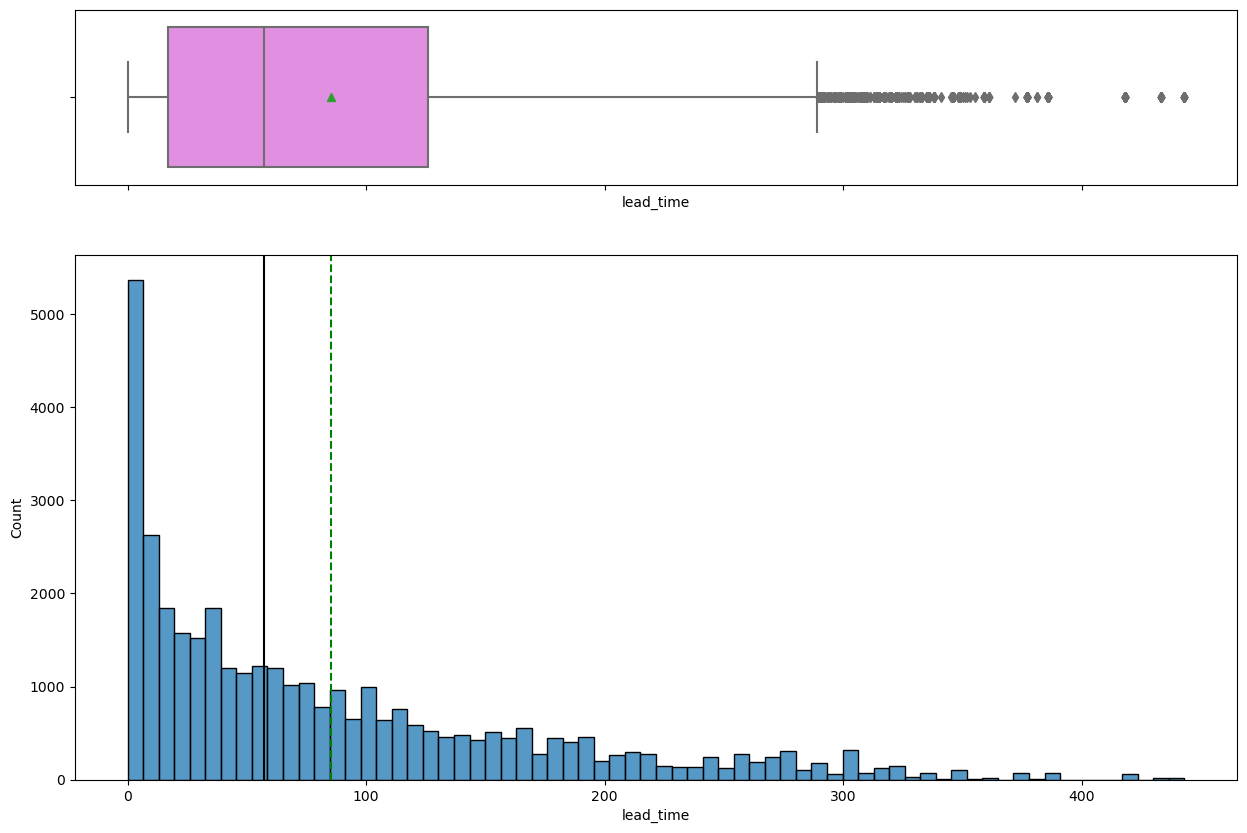

<IPython.core.display.Javascript object>

In [406]:
# Create a histogram and boxplot for 'lead_time'
histogram_boxplot(df, "lead_time")

- This distribution is heavily right-skewed, indicating that the majority of the bookings having a lead time of less than 100 days.
- There are a handful bookings with 0 leading time, indicating some customers made last minute bookings.
- There are a many outliers present in this variable. Specifically, values above 300 days are represented as outliers in the boxplot.

`avg_price_per_room`

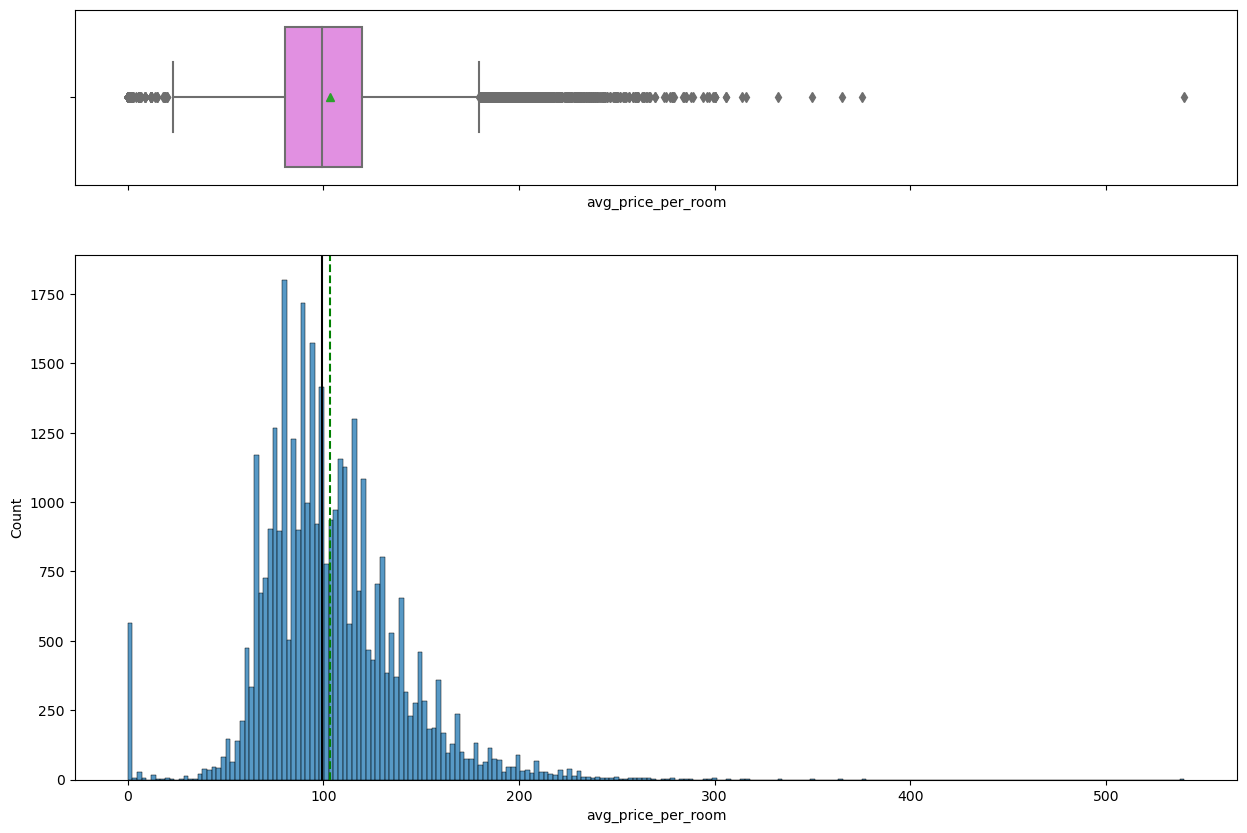

<IPython.core.display.Javascript object>

In [407]:
# Create a histogram and boxplot for 'avg_price_per_room'
histogram_boxplot(df, "avg_price_per_room")

* The distribution is slightly right-skewed with many upper outliers, indicating a few bookings with significantly higher prices than the average. 
- The average price per room is around 100 euros.


In [408]:
df[df["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


<IPython.core.display.Javascript object>

In [409]:
# filter the average price per room as 0 euros for market segment type
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

- There are some lower outliers with values of 0. This is because some bookings were either complimentary  or comes with specific online booking promotions, resulting in a price of zero.
- We will go ahead and replace the values above 500 euros with the upper whisker value. 

In [410]:
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

<IPython.core.display.Javascript object>

In [411]:
# assigning the outliers the value of upper whisker
df.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

<IPython.core.display.Javascript object>

`no_of_previous_cancellations`


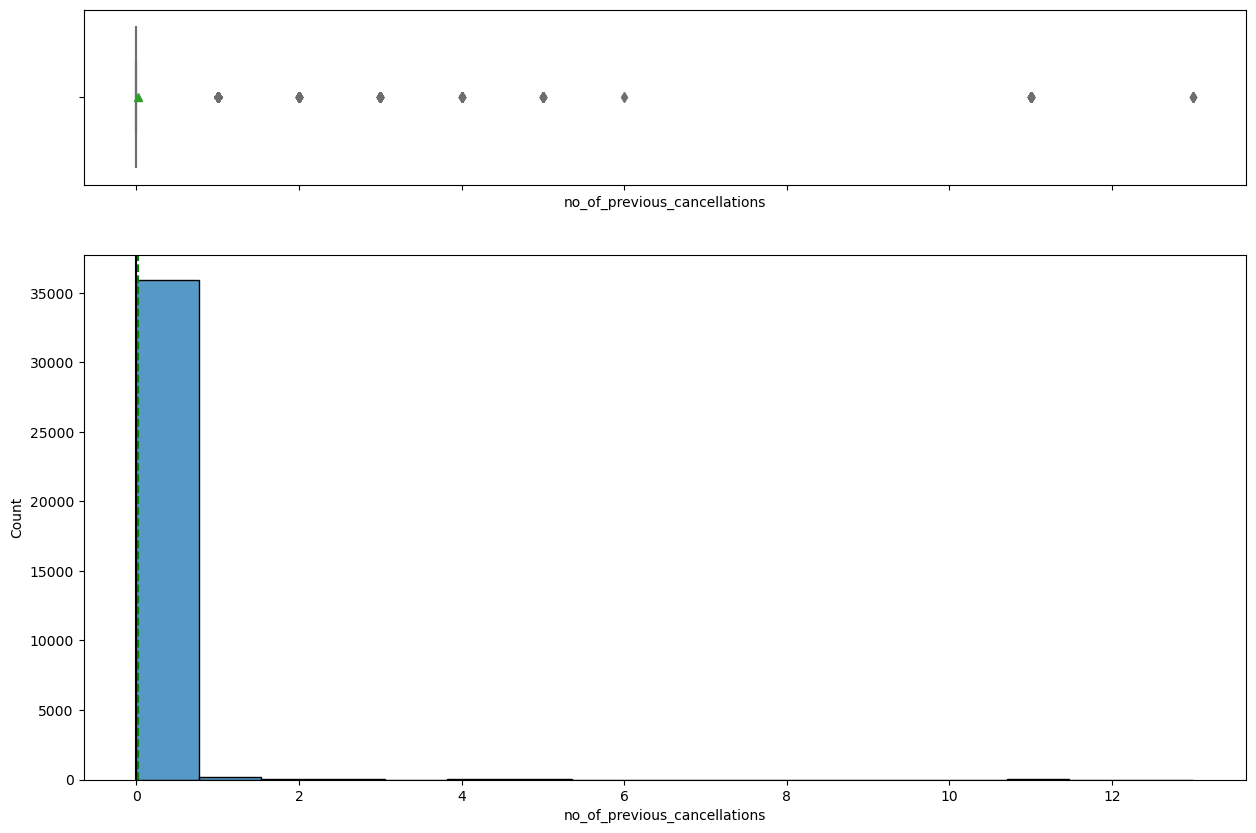

<IPython.core.display.Javascript object>

In [412]:
# Create a histogram and boxplot for 'no_of_previous_cancellations'
histogram_boxplot(df, "no_of_previous_cancellations")

- ~ 98% of bookings do not come with any previous cancellation history. This makes sense because majority of the customers are new and do not have a history of prior bookings.
- Some customers had up to 13 cancellations prior to the current booking. 

`no_of_previous_bookings_not_canceled`


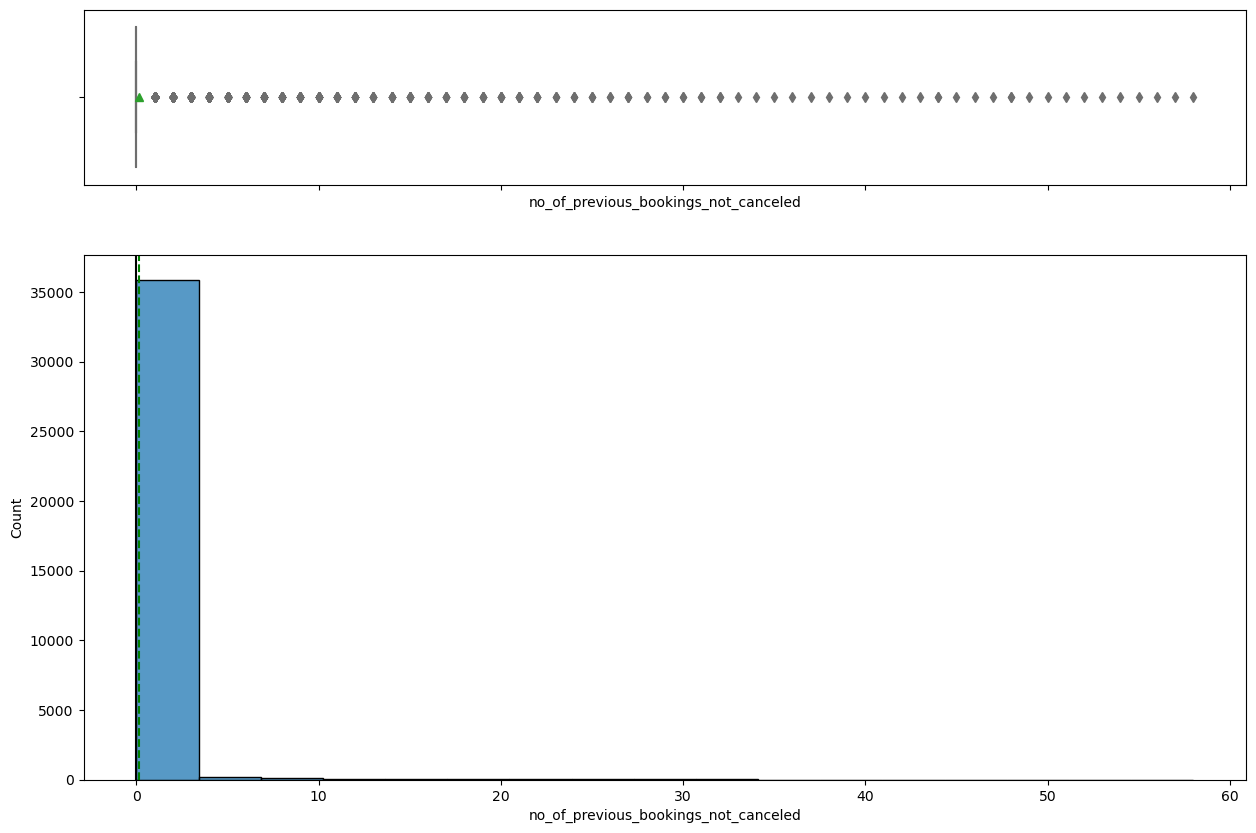

<IPython.core.display.Javascript object>

In [413]:
# Create a histogram and boxplot for 'no_of_previous_bookings_not_canceled'
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

- ~98% of the bookings in the distribution don't have any record of prior non-cancellations. This is expected since the majority of customers are new and haven't made any previous bookings.
- There are some customers have stayed at the hotel for up to 58 times prior to the current booking.

In [414]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

`no_of_adults`

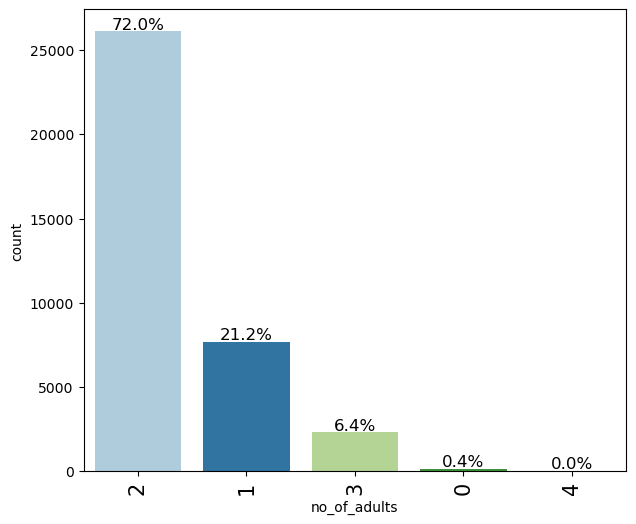

<IPython.core.display.Javascript object>

In [415]:
# Create a barplot for 'no_of_adults'
labeled_barplot(df, "no_of_adults", perc=True)

- 72% of bookings contain 2 adults, which is a common scenario. 
- There are a few bookings in which no adults are included. This needs to be investigated further to ensure compliance with any relevant policies such as age restrictions.

`no_of_children`

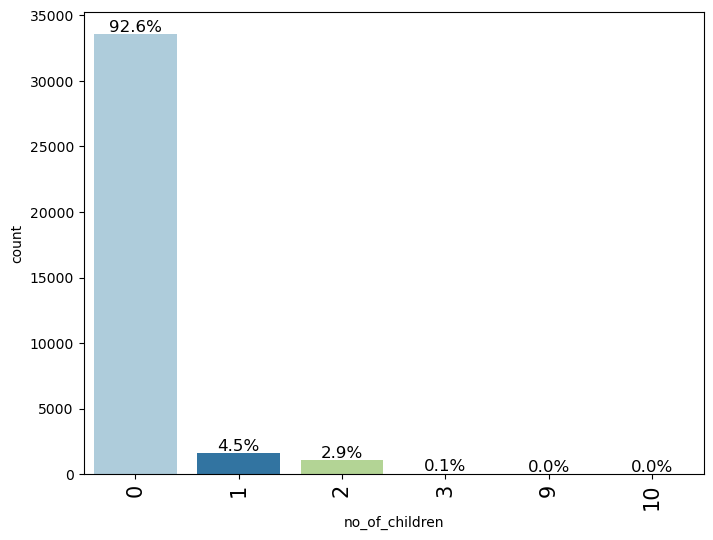

<IPython.core.display.Javascript object>

In [416]:
# Create a barplot for 'no_of_children'
labeled_barplot(df, "no_of_children", perc=True)

- Only ~7.4% of the bookings include children. 
- There are a couple bookings where the number of children reaches up to 10, we will go ahead and replace 9 and 10 children with 3.

In [417]:
# replacing 9, and 10 children with 3
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

<IPython.core.display.Javascript object>

`no_of_weekend_nights`

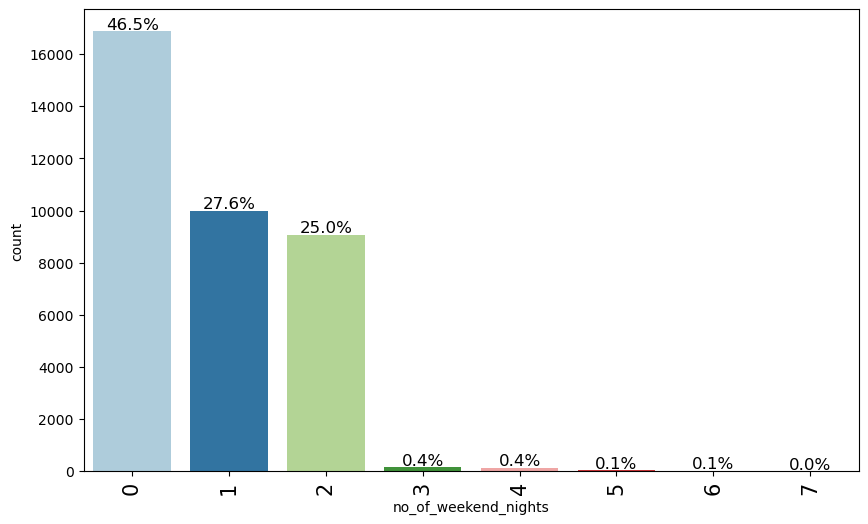

<IPython.core.display.Javascript object>

In [418]:
# Create a barplot for 'no_of_weekend_nights'
labeled_barplot(df, "no_of_weekend_nights", perc=True)

- More than half of the bookings include 1 or 2 weekend nights, indicating most customers prefer shorter weekend stays at the hotel.
- There are a few bookings with durations of up to 7 weekend nights.

`no_of_week_nights`

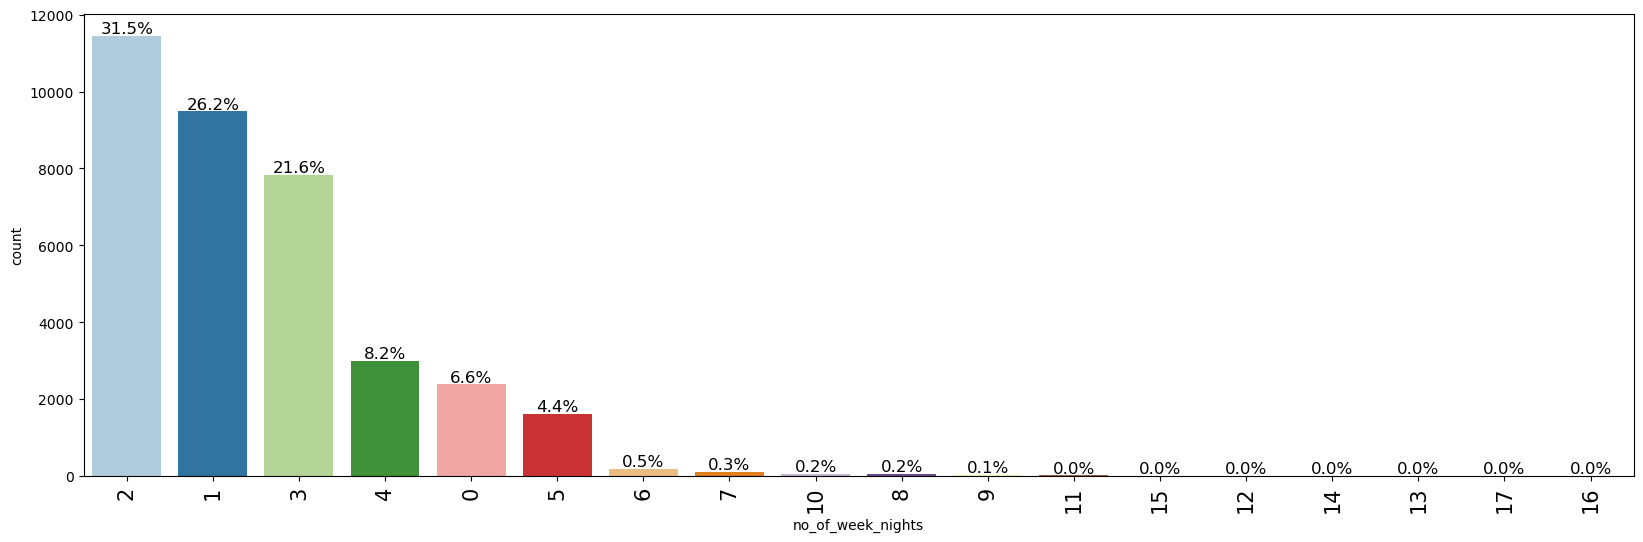

<IPython.core.display.Javascript object>

In [419]:
# Create a barplot for 'no_of_week_nights'
labeled_barplot(df, "no_of_week_nights", perc=True)

- Most customers stay at the hotel for 1-3 week nights, indicating a preference for shorter stays during the weekdays.
- There are some bookings with duration up to 16 week nights.

`type_of_meal_plan`

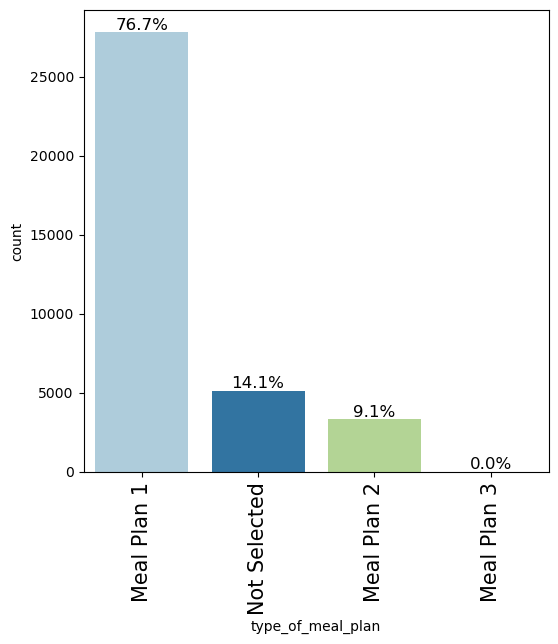

<IPython.core.display.Javascript object>

In [420]:
# Create a barplot for 'type_of_meal_plan'
labeled_barplot(df, "type_of_meal_plan", perc=True)

- 76.7% of bookings have opted for Meal Plan 1. About 14.1% of bookings did not select any meal plan.

`required_car_parking_space`

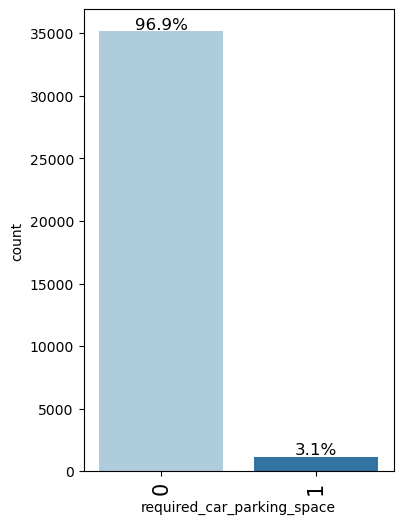

<IPython.core.display.Javascript object>

In [421]:
# Create a barplot for 'required_car_parking_space'
labeled_barplot(df, "required_car_parking_space", perc=True)

- Nearly 97% of bookings do not require a car parking space.

`room_type_reserved`

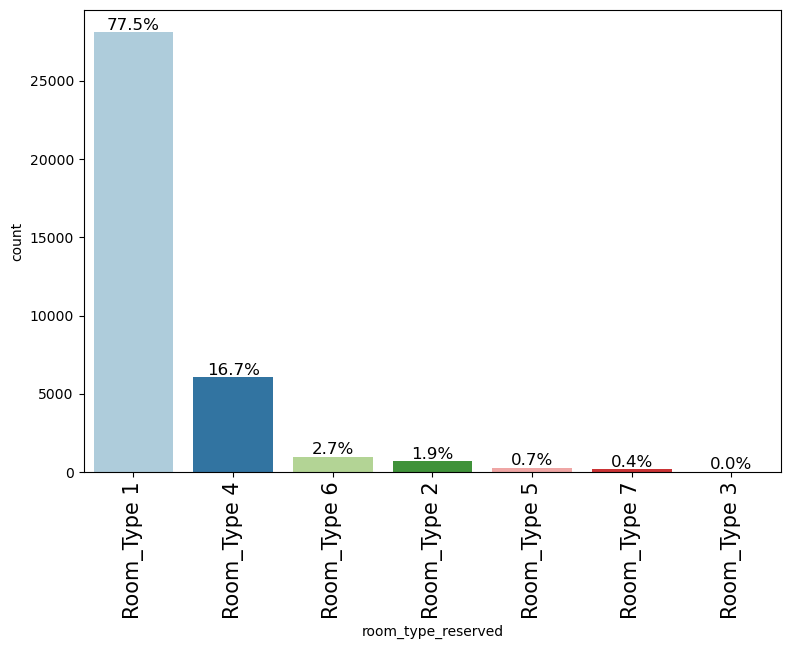

<IPython.core.display.Javascript object>

In [422]:
# Create a barplot for 'room_type_reserved'
labeled_barplot(df, "room_type_reserved", perc=True)

- Room_Type_1 is the most popular among all bookings, representing approximately 77.5% of the total.

`arrival_year`

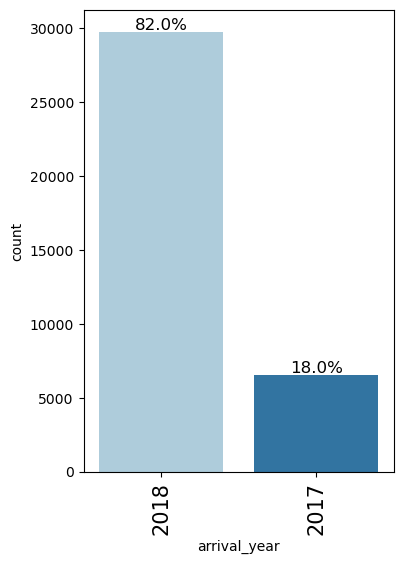

<IPython.core.display.Javascript object>

In [423]:
# Create a barplot for 'arrival_year'
labeled_barplot(df, "arrival_year", perc=True)

- All bookings occurred within the time frame of 2017 and 2018. 
- Approximately 82% of bookings took place in the year 2018. 

`arrival_month`

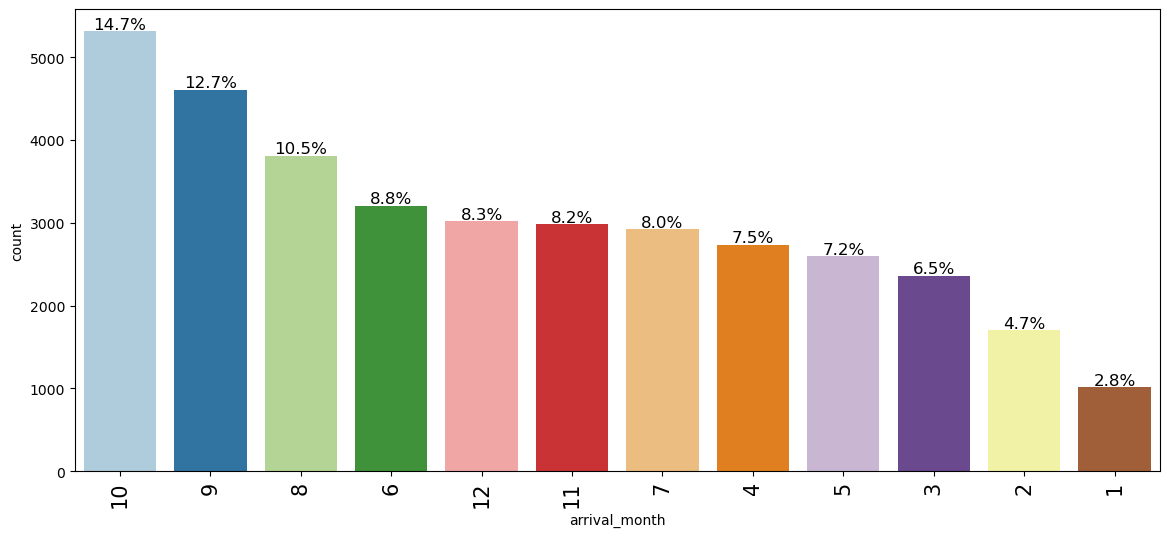

<IPython.core.display.Javascript object>

In [424]:
# Create a barplot for 'arrival_month'
labeled_barplot(df, "arrival_month", perc=True)

- October is the busiest month, which has the highest number of recorded bookings (~14.7%), followed by September and August. 
- January, February, and March have the lowest numbers of recorded bookings. 

`arrival_date`

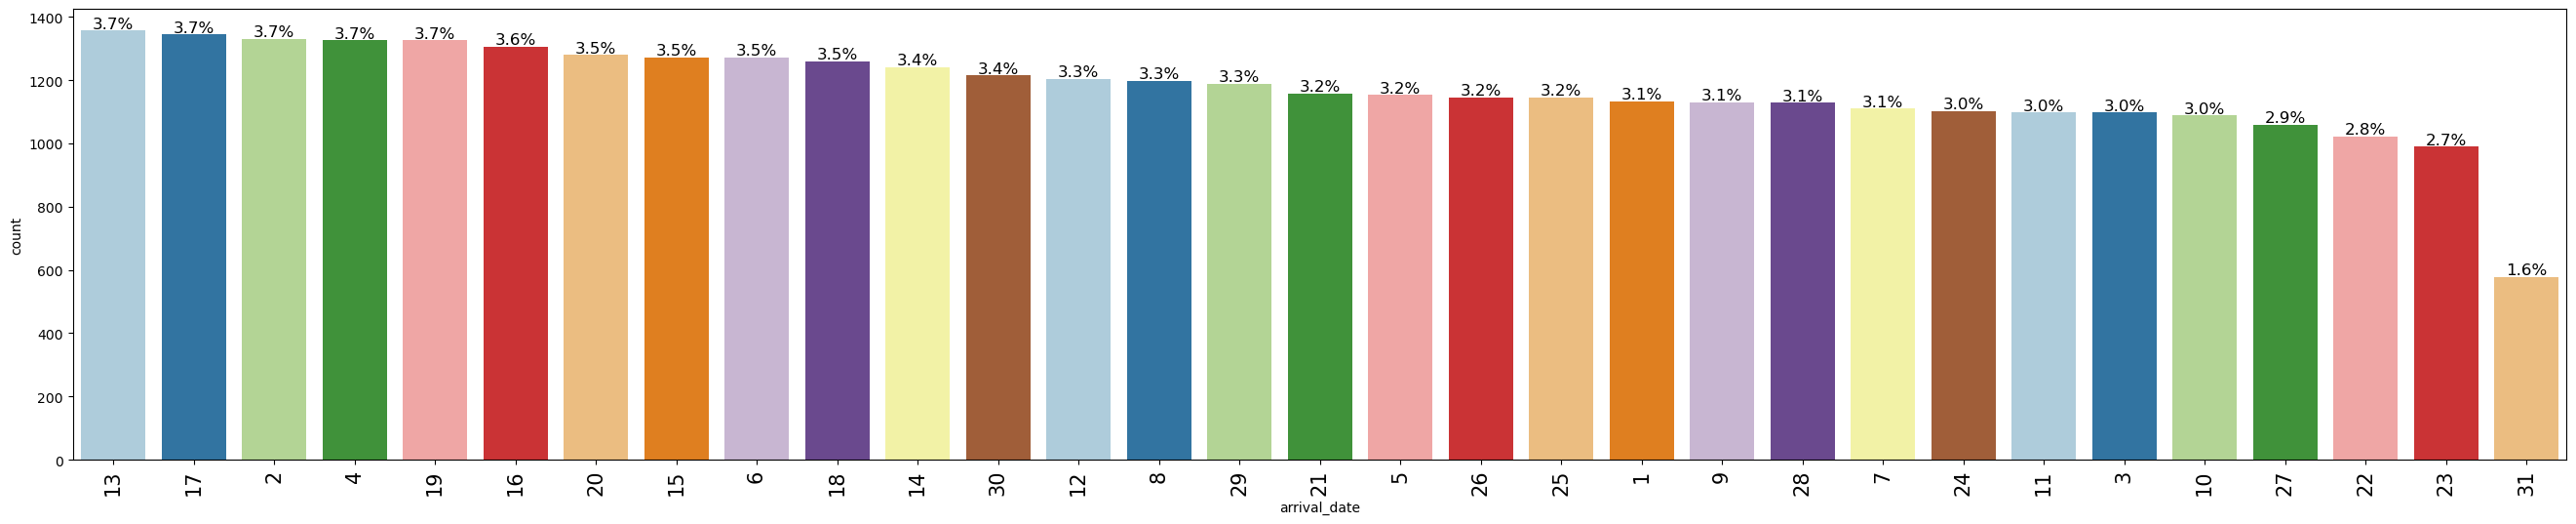

<IPython.core.display.Javascript object>

In [425]:
# Create a barplot for 'arrival_date'
labeled_barplot(df, "arrival_date", perc=True)

- The arrival dates of bookings are generally evenly distributed throughout the month, except for the 31st, which exhibits noticeably lower numbers of recorded bookings. This makes sense because some months do not have the 31st day. 

`market_segment_type`

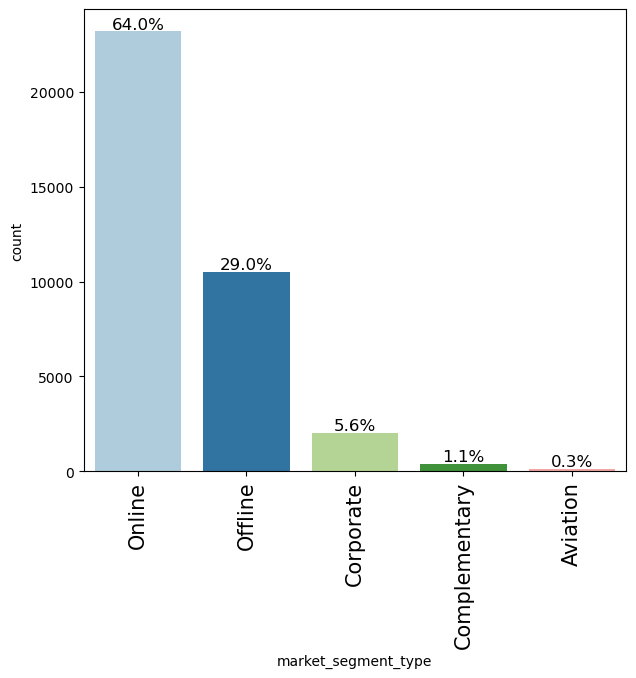

<IPython.core.display.Javascript object>

In [426]:
# Create a barplot for 'market_segment_type'
labeled_barplot(df, "market_segment_type", perc=True)

- 64% of the bookings were made online.

` repeated_guest`

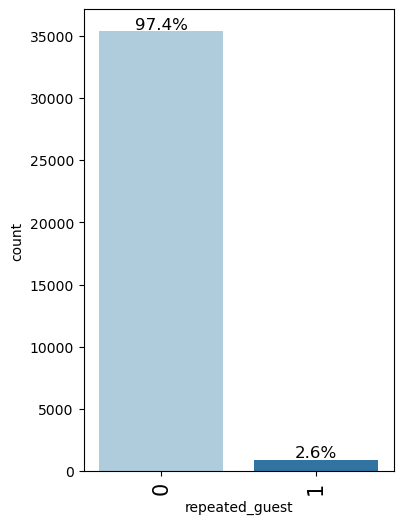

<IPython.core.display.Javascript object>

In [427]:
# Create a barplot for 'repeated_guest'
labeled_barplot(df, "repeated_guest", perc=True)

- 97.4% of the bookings are made by new customers.

` no_of_special_requests`

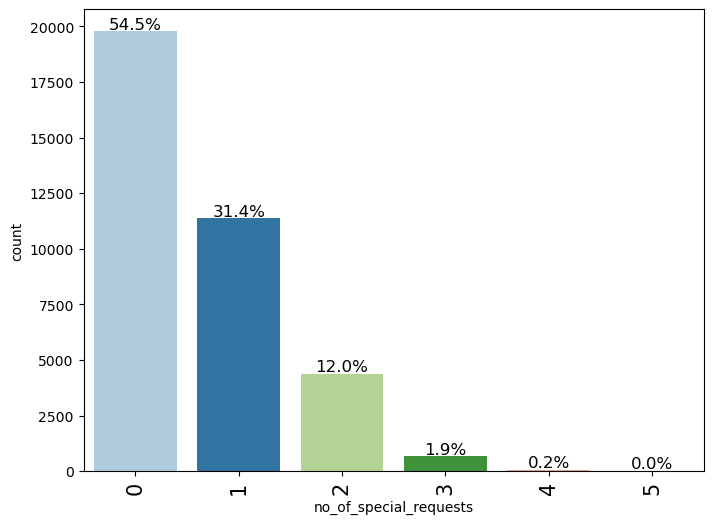

<IPython.core.display.Javascript object>

In [428]:
# Create a barplot for 'no_of_special_requests'
labeled_barplot(df, "no_of_special_requests", perc=True)

 - 54.5% of the bookings do not include any special requests. Whereas, 31.4% of the bookings include 1 special request.

`booking_status`

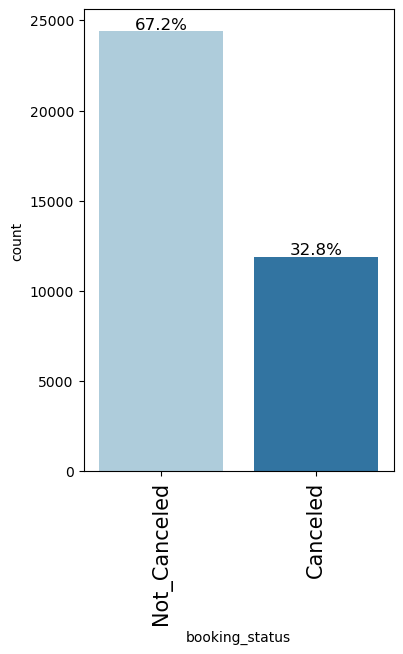

<IPython.core.display.Javascript object>

In [429]:
# Create a barplot for 'booking_status'
labeled_barplot(df, "booking_status", perc=True)

- 32.8% of the bookings in the dataset were canceled.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [11]:
# encode Canceled bookings to 1 and Not_Canceled as 0
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

<IPython.core.display.Javascript object>

In [12]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1


<IPython.core.display.Javascript object>

### Bivariate Analysis

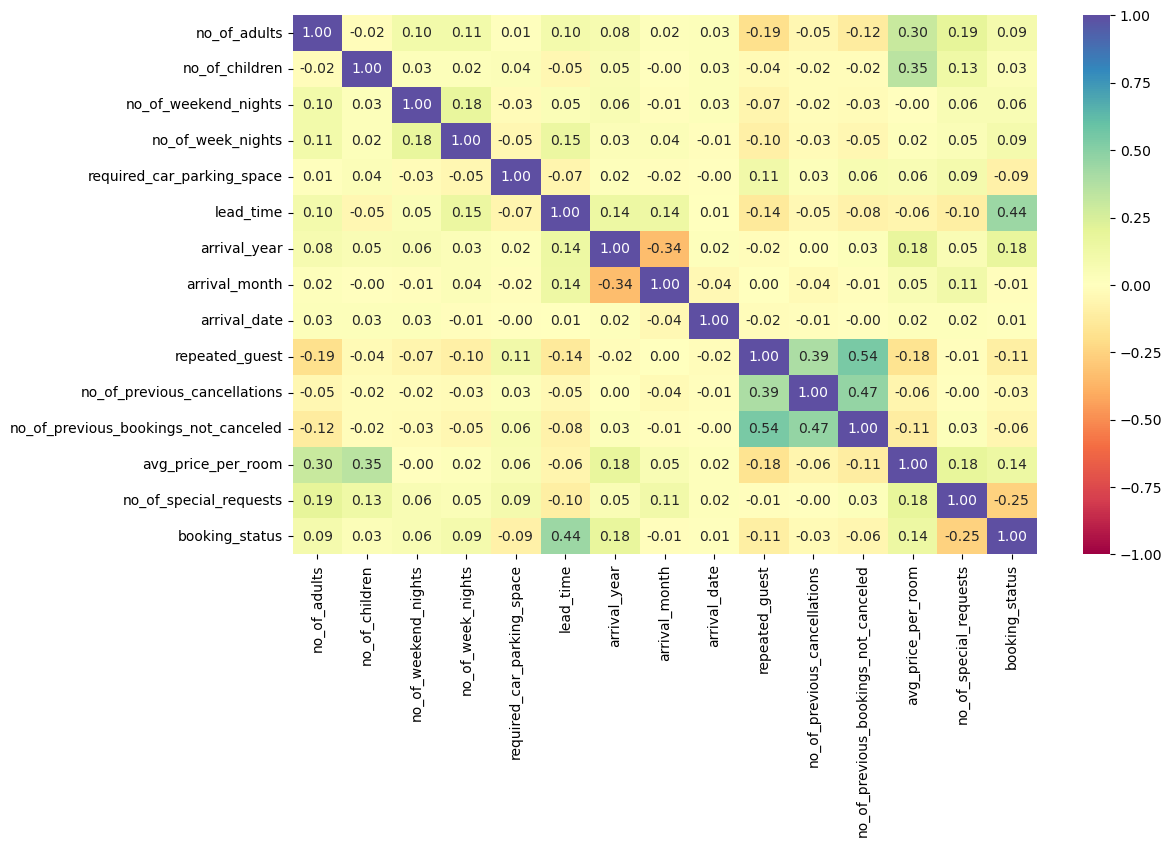

<IPython.core.display.Javascript object>

In [431]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- There is a moderate positive correlation between the variables 'repeated_guest', 'no_of_previous_cancellation', and 'no_of_previous_bookings_not_canceled'. This may provide insights into guest behavior and their history with the hotel.
- There is a moderate positive correlation between 'lead_time' and 'booking_status'. This indicates the longer lead times are associated with an increased risk of cancellations.
- There is a moderate positive correlation between 'ave_price_per_room' and 'no_of_adults', as well as 'no_of_children'. This correlation is expected since the price of a room typically varies based on the number of guests staying, including both adults and children.

In [432]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(df, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [465]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

`avg_price_per_room` vs `market_segment_type`

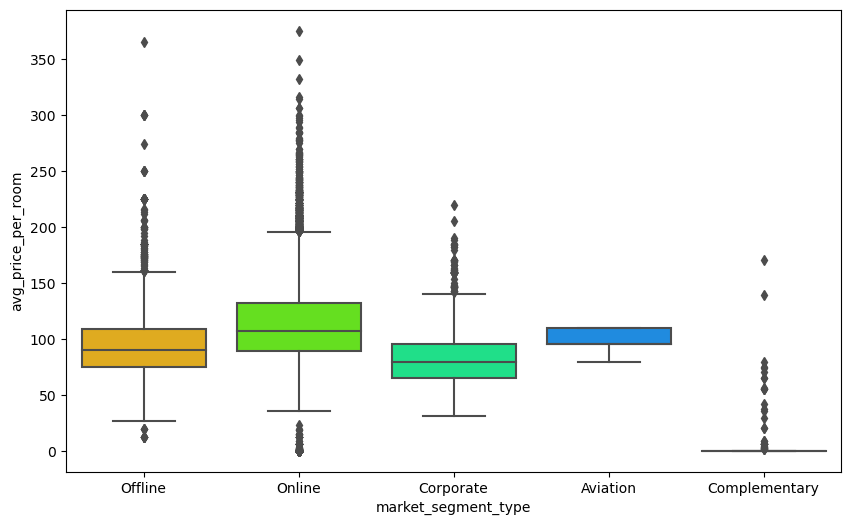

<IPython.core.display.Javascript object>

In [434]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

- Bookings made online exhibit a broader range of prices compared to other market segment types. This category contains the highest average price per room, suggesting that online bookings tend to involve higher-priced accommodations.

- Bookings associated with the 'Aviation' category appear to have a more consistent or fixed pricing structure, potentially indicating standardized rates within this segment.

- The 'Complimentary' bookings category displays outliers, which could be attributed to additional services or special requests with added on charges. 

`market_segment_type` vs `booking_status`

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


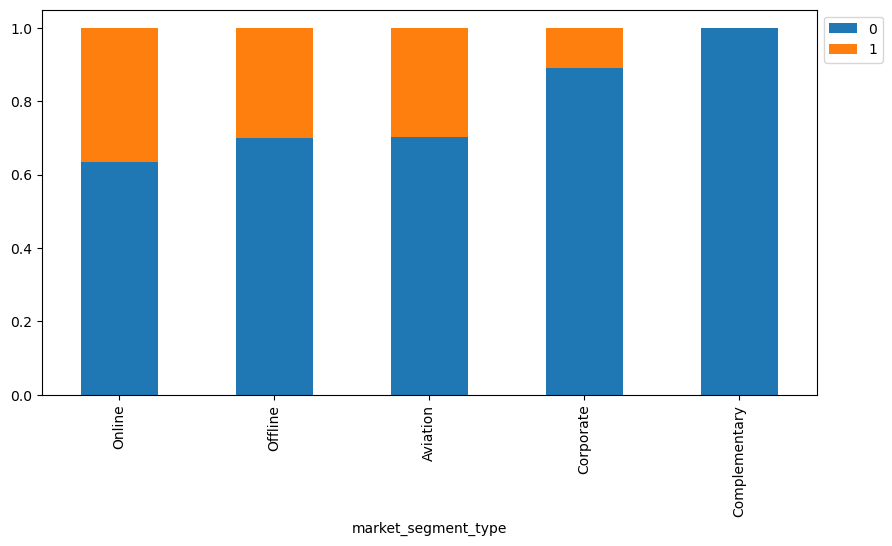

<IPython.core.display.Javascript object>

In [435]:
stacked_barplot(df, "market_segment_type", "booking_status")

- Customers who made their bookings online tend to have a higher rate of cancellations(~40%). Because of the convenience and ease of online booking, which may lead to more spontaneous or tentative reservations that are subsequently canceled.
- The complimentary bookings have no cancellations. 

`no_of_special_requests` vs `no_of_previous_cancellations`

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


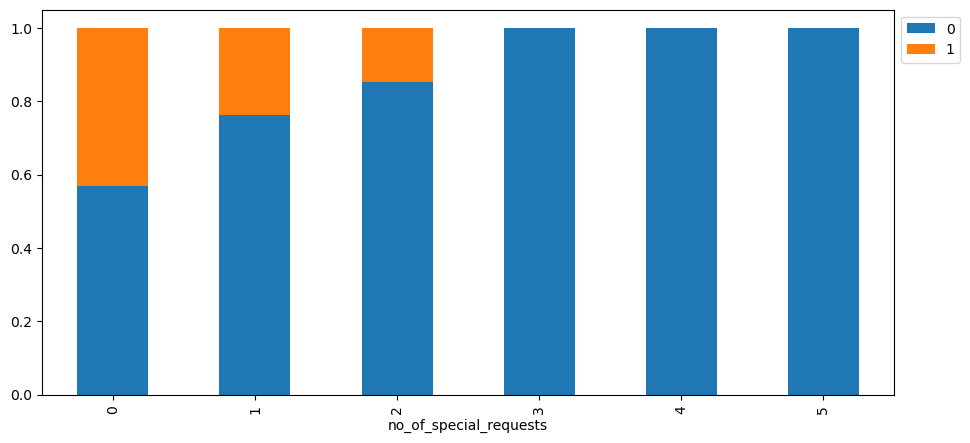

<IPython.core.display.Javascript object>

In [436]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

- Bookings that has no special requests has the highest chances of being canceled, followed by bookings with 1 and 2 special requests. 
- It's less likely for a booking with more than 2 special requests to be canceled. This suggests that the presence of special requests may indicate a higher level of commitment, potentially reducing the chances of cancellation.

`no_of_special_requests` vs`avg_price_per_room`

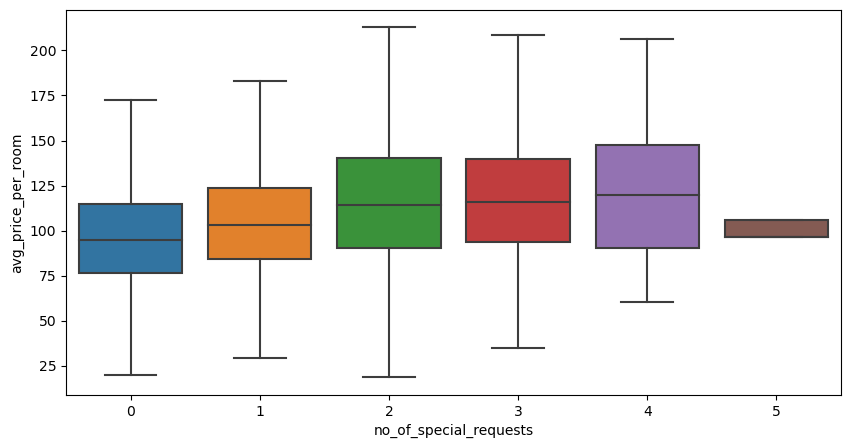

<IPython.core.display.Javascript object>

In [437]:
# create a boxplot for 'no_of_special_requests' and 'average_price_per_room'
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df, x="no_of_special_requests", y="avg_price_per_room", showfliers=False
)
plt.show()

- The mean average price per room tends to increase as the number of special requests increases. This indicates that the guests who make more special requests may expect to pay higher price for additional services. 
- It seems like the price per room remains relatively fixed when there are 5 special requests, indicating a set package or pricing arrangement for a specific level of customization.

`avg_price_per_room` vs `booking_status`

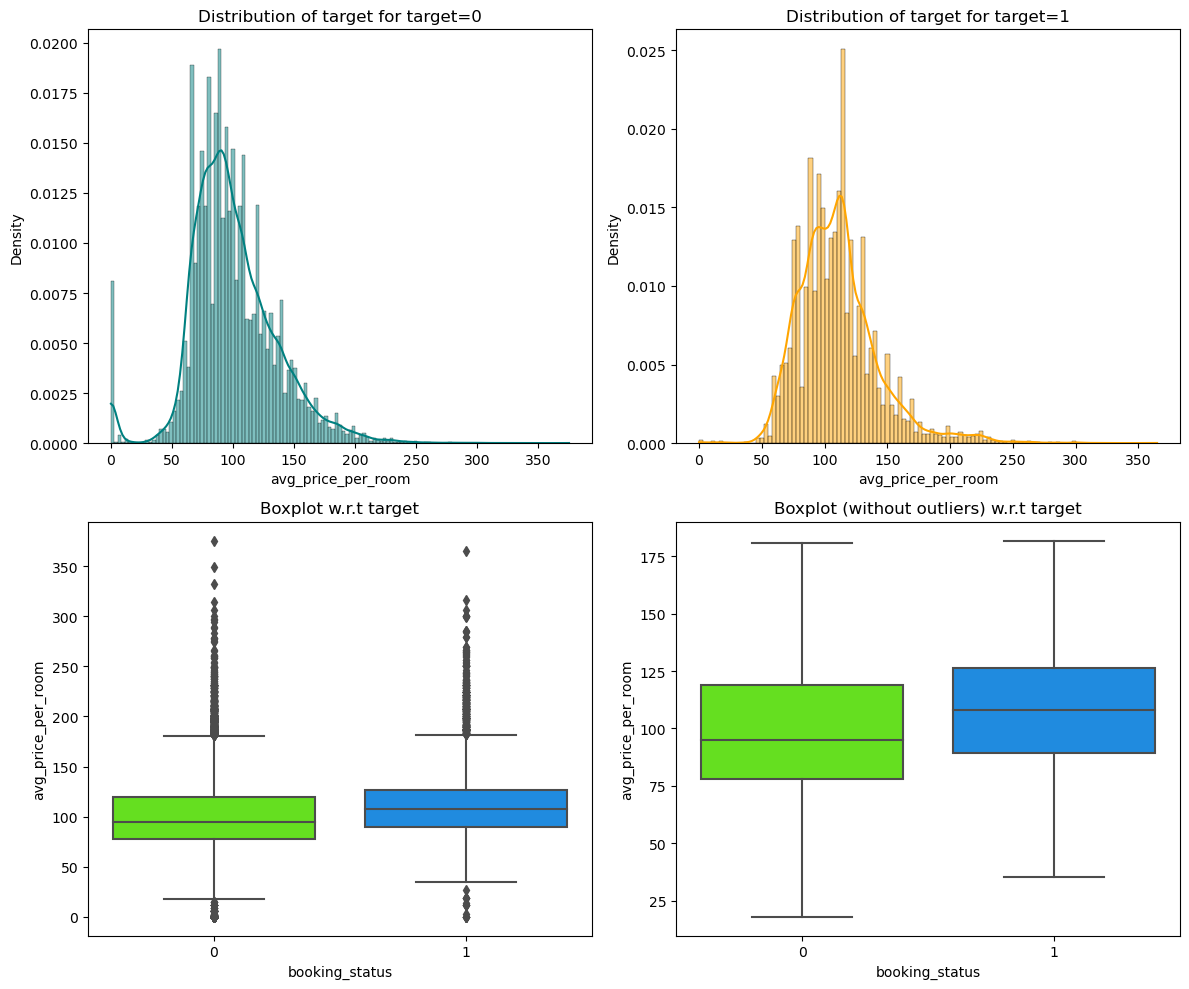

<IPython.core.display.Javascript object>

In [438]:
# create a disctribution plot for 'avg_price_per_room' and a boxplot for 'avg_price_per_room' vs 'booking_status' with respect to target variable 'booking_status'
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

- Cancellations tend to occur at a slightly higher higher price per room. (~40-175 eruos)

`booking_status` vs `lead_time`

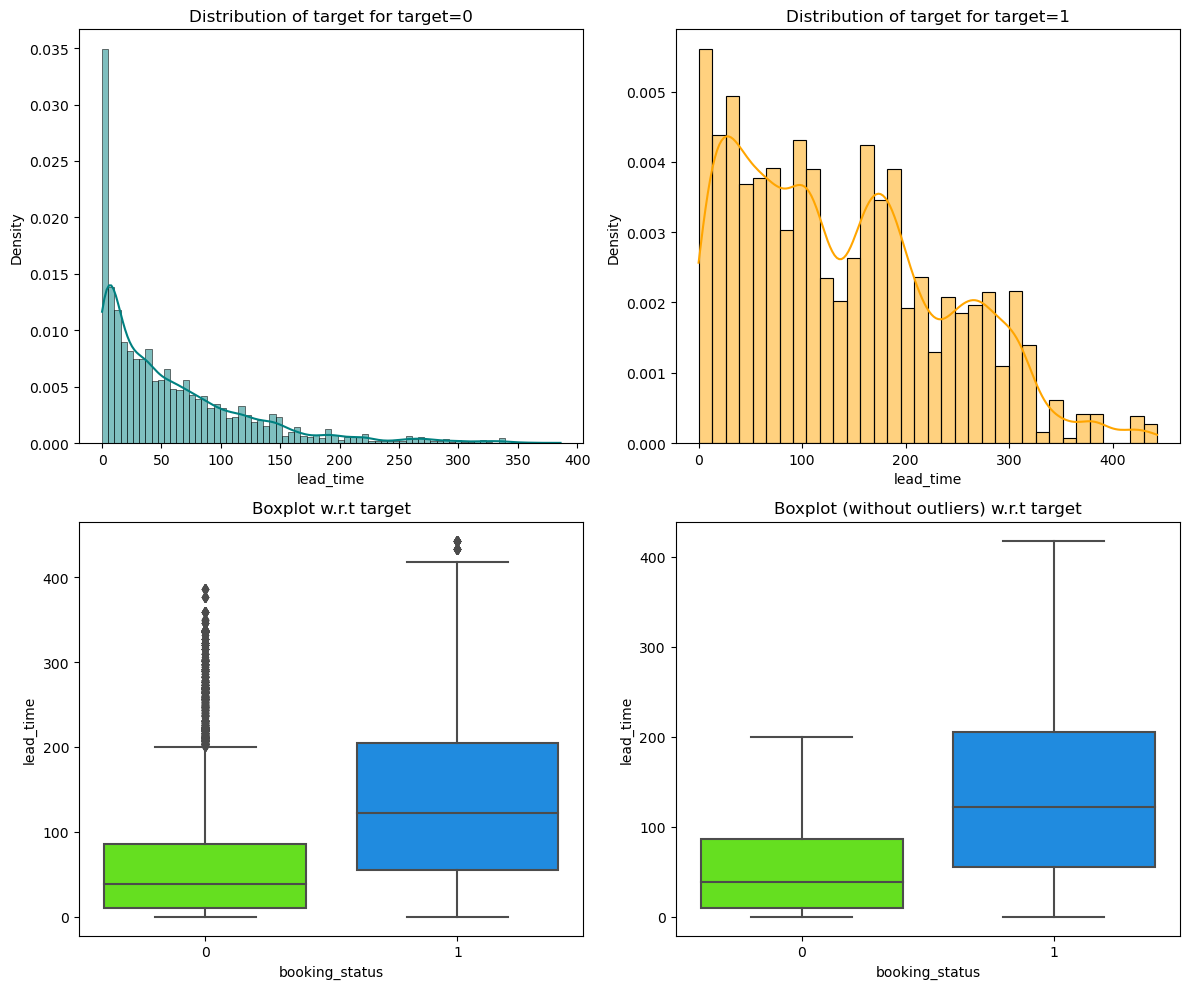

<IPython.core.display.Javascript object>

In [448]:
# create a disctribution plot for 'lead_time' and a boxplot for 'lead_time' vs 'booking_status' with respect to target variable 'booking_status'
distribution_plot_wrt_target(df, "lead_time", "booking_status")

- There is a distinct boundary that indicates a separation of booking status based on the values of lead time. 
- Bookings with longer lead time are more susceptible to be canceled. 

`no_of_family_members` and `booking_status`

In [445]:
# create a new datafrmae of the cusomters who traveled with their families
family_df = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_df.shape

(28441, 18)

<IPython.core.display.Javascript object>

In [449]:
# create a new column of 'no_of_familily_members'
family_df["no_of_family_members"] = (
    family_df["no_of_adults"] + family_df["no_of_children"]
)

<IPython.core.display.Javascript object>

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


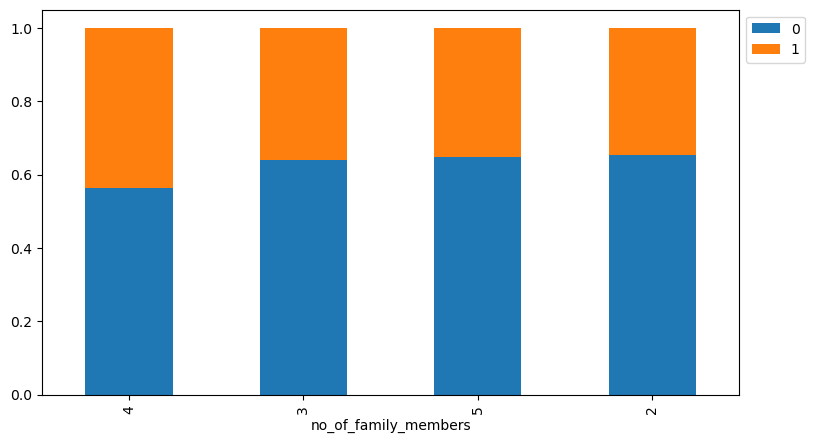

<IPython.core.display.Javascript object>

In [466]:
# create stacked barplot for 'no_of_family_members' and 'booking_status'
stacked_barplot(family_df, "no_of_family_members", "booking_status")

- Bookings with 4 family members have the highest chances of being canceled (~44%).

`total_days` vs `booking_status`

In [343]:
# create a new dataframe of customers who stay for at least a day at the hotel
stay_df = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_df.shape

(17094, 18)

<IPython.core.display.Javascript object>

In [344]:
stay_df["total_days"] = stay_df["no_of_week_nights"] + stay_df["no_of_weekend_nights"]

<IPython.core.display.Javascript object>

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

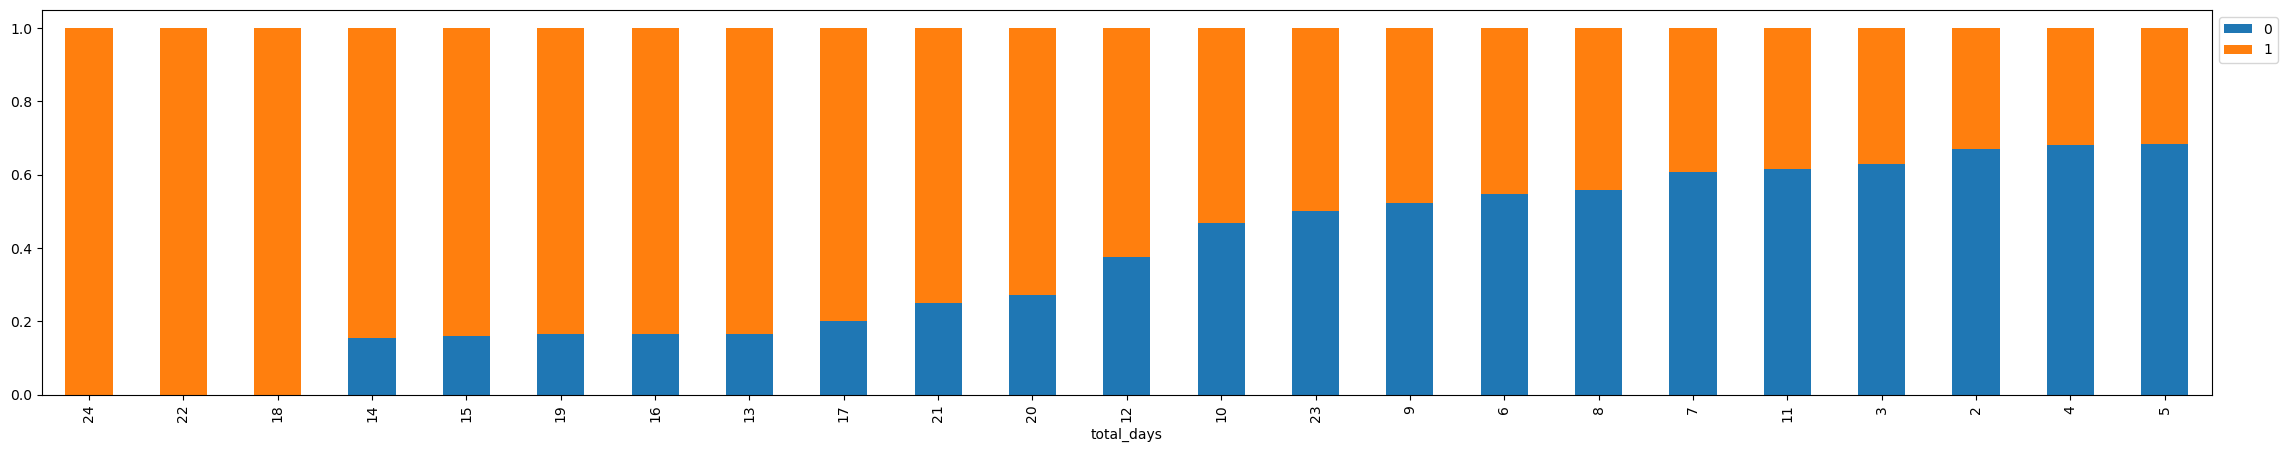

<IPython.core.display.Javascript object>

In [467]:
# create stacked barplot for 'total_days' and 'booking_status'
stacked_barplot(stay_df, "total_days", "booking_status")


- It appears that longer booking durations are associated with a higher likelihood of cancellation.

`repeated_guest`vs `bookings_status`

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


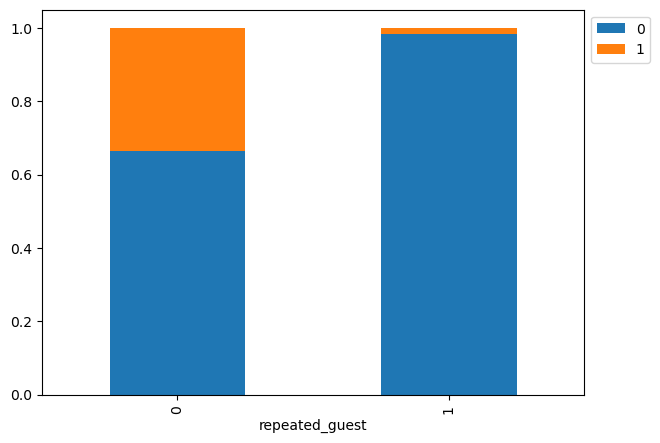

<IPython.core.display.Javascript object>

In [477]:
# create a stacked barplot for 'repeated_guest' and 'booking_status'
stacked_barplot(df, "repeated_guest", "booking_status")

- ~34% of new customers canceled their bookings.
- Out of 930 repeated guests, only 16 of them (~1.7%) canceled their bookings. It suggests that customers who have previously stayed at the hotel have become loyal to the brand are less likely to cancel their bookings.

`month` vs `guests`

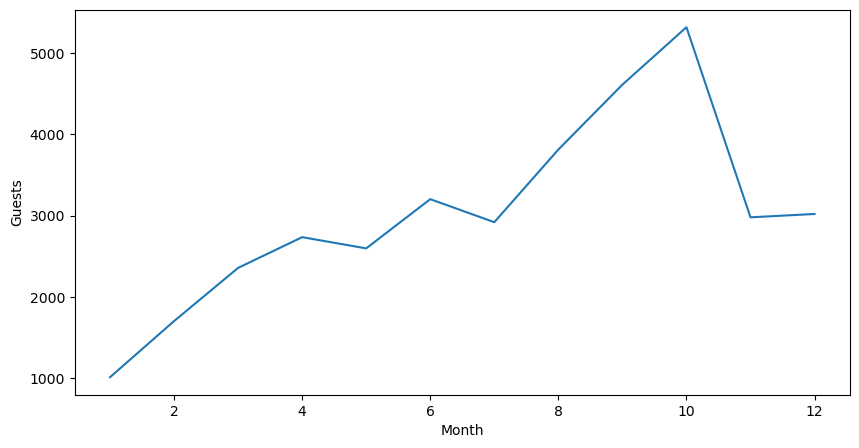

<IPython.core.display.Javascript object>

In [156]:
# grouping the data on arrival months and extracting the count of bookings
monthly_df = df.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_df = pd.DataFrame(
    {"Month": list(monthly_df.index), "Guests": list(monthly_df.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_df, x="Month", y="Guests")
plt.show()

- There's a gradual increase in the number of bookings from the beginning of the year, with a peak observed in October (>5000 bookings). 
- There is a significant decline in the number of bookings in November. 
- This pattern suggests a seasonal trend, where the demand for bookings gradually builds up throughout the year, makes June - October the busiest months, possibly due to various factors such as holidays or favorable weather conditions.

`arrival_month` vs `booking_status`

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


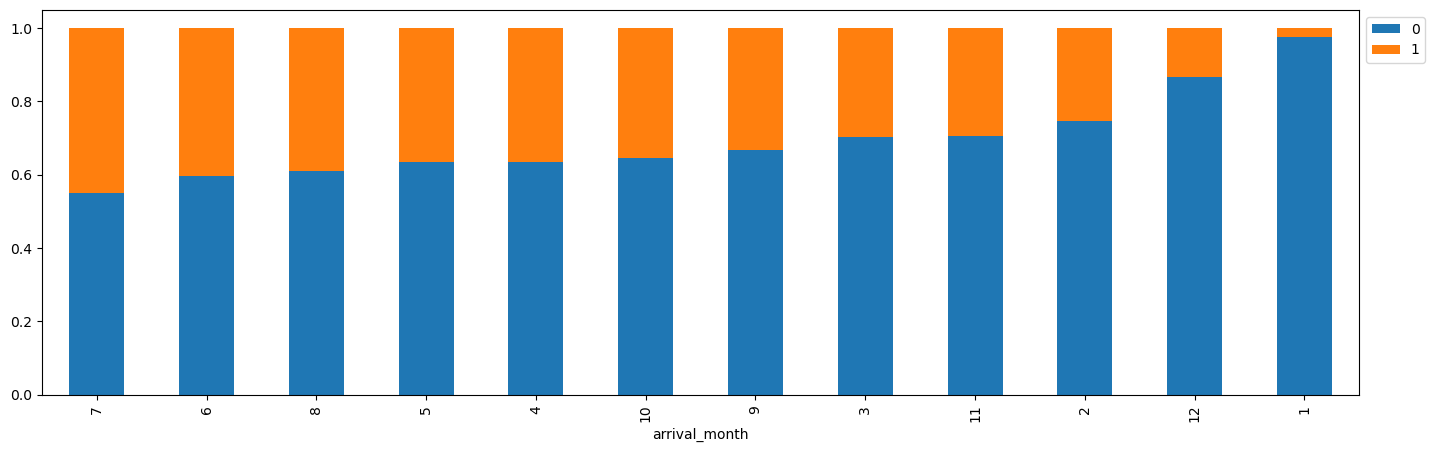

<IPython.core.display.Javascript object>

In [379]:
stacked_barplot(df, "arrival_month", "booking_status")

- 40% of bookings made for October, which was the busiest month, were canceled at the end.
- The summer months had the highest cancellations, indicating the fluctuation in demand during the peak seasons. 
- The winter months had the lest cancellations, indicating that customers tend to stick to their travel plans during the holiday seasons.

`avg_price_per_room` vs `arrival_month`

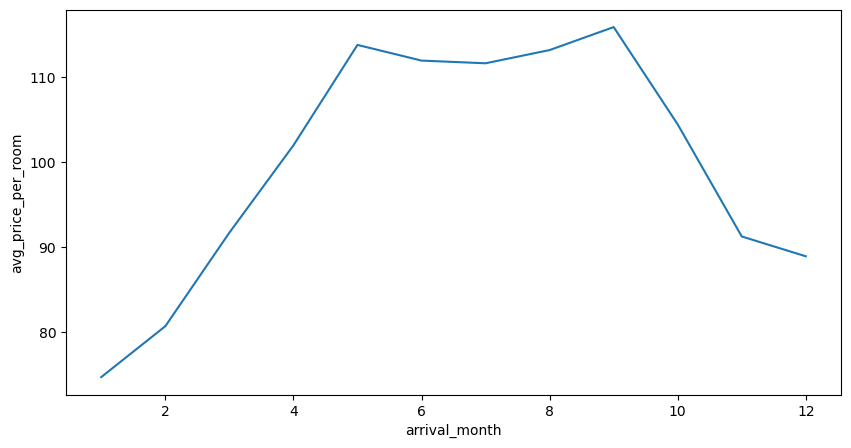

<IPython.core.display.Javascript object>

In [380]:
# create lineplot between average 'avg_price_per_room' and 'arrival_month'
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="arrival_month", y="avg_price_per_room", ci=None)
plt.show()

- The price per room shows a consistent increase from the beginning of the year until May. After May, the average price per room remains relatively stable until September. From September onwards, there is a gradual decrease in the average price per room until the end of the year. This indicates that bookings are made between May to September are the most expensive(~110 euros).


## Data Preprocessing


### Outlier Check

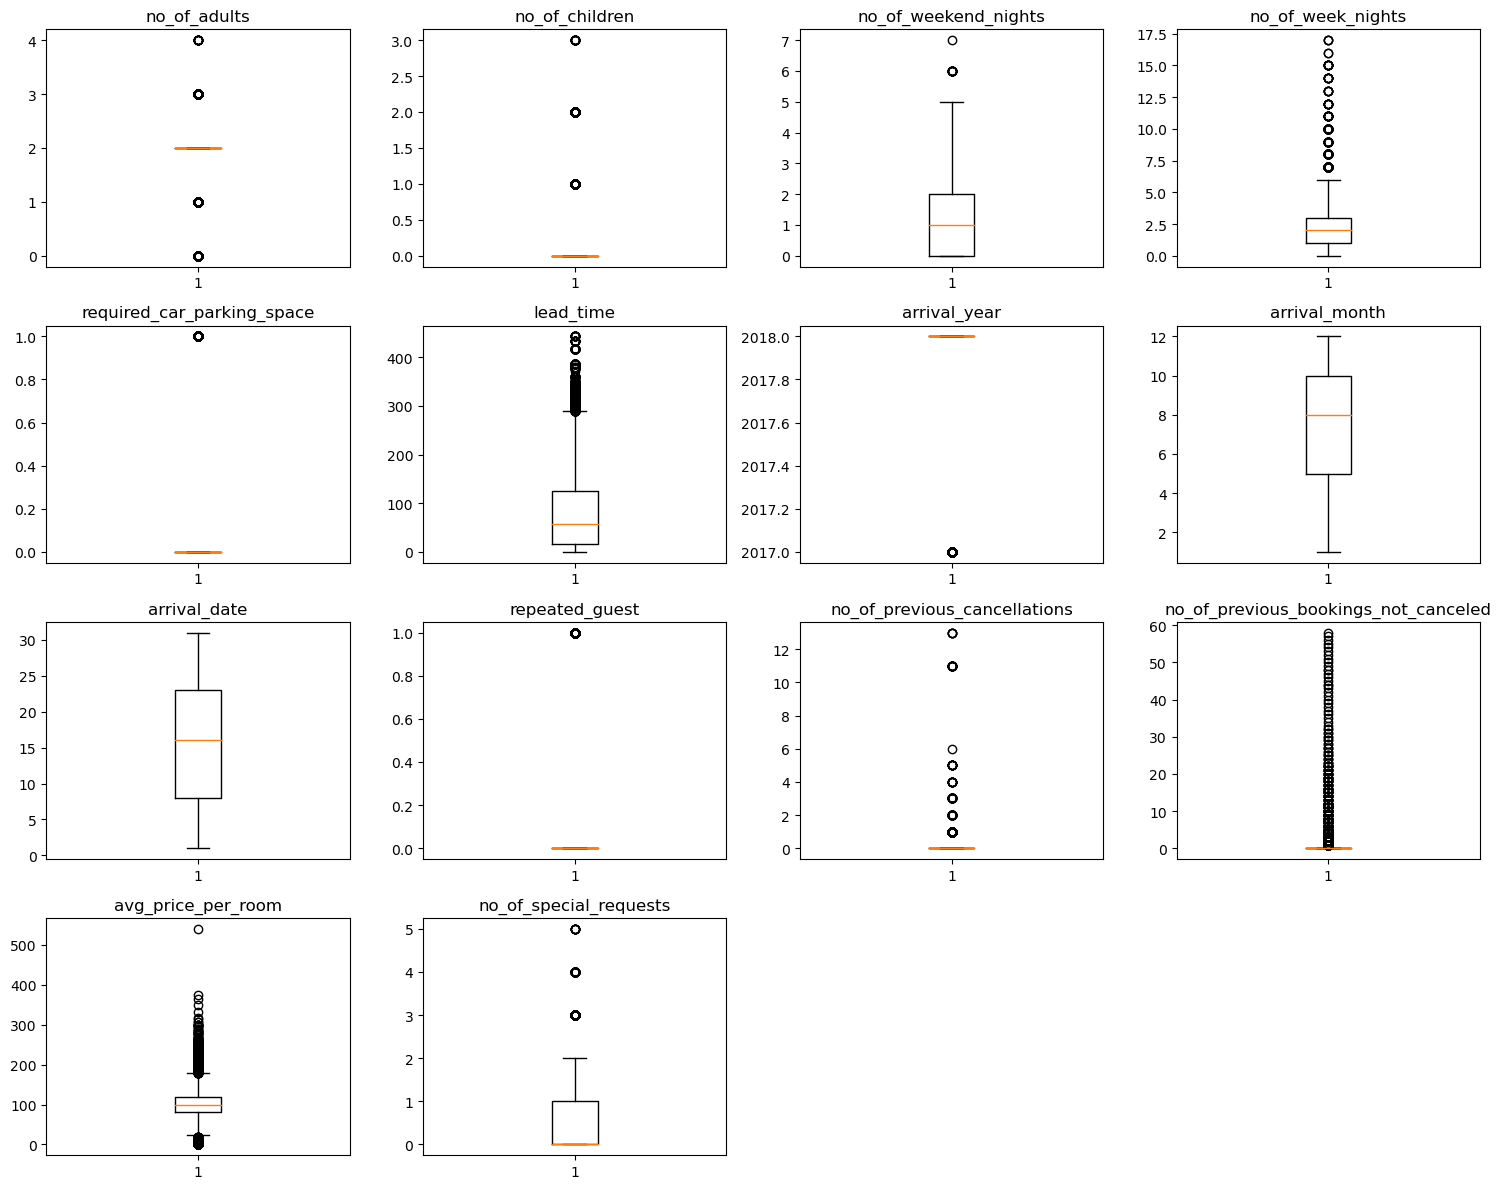

<IPython.core.display.Javascript object>

In [202]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Many numerical features in the data set have outliers present in them. However, these outliers will not be treated as they are proper values.

## Building a Logistic Regression model

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

In [210]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [211]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [218]:
# specifying the independent and dependent variables
X = df.drop(["booking_status"], axis=1)
y = df["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [219]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

In [220]:
# train logistic regression on X_train and y_train
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)
# print summary of the model
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Tue, 04 Jul 2023   Pseudo R-squ.:                  0.3292
Time:                        18:28:56   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

<IPython.core.display.Javascript object>

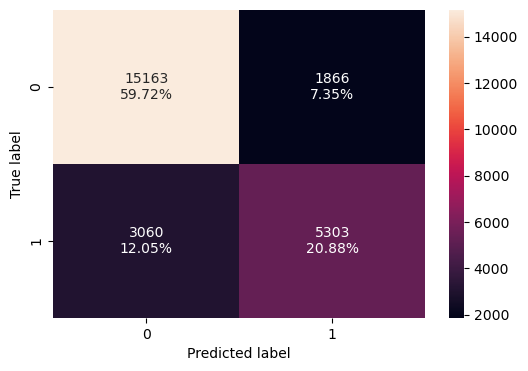

<IPython.core.display.Javascript object>

In [223]:
# create a confusion matrix
confusion_matrix_statsmodels(lg, X_train, y_train)

In [221]:
# checkingfor model performance for training data
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


<IPython.core.display.Javascript object>

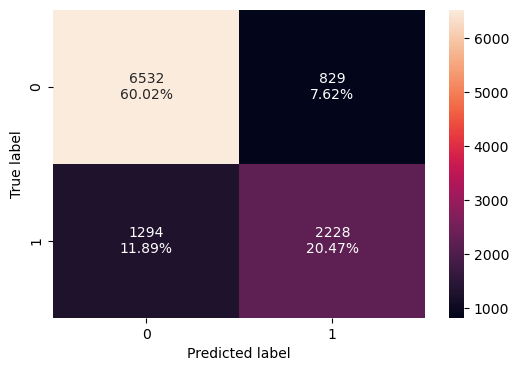

<IPython.core.display.Javascript object>

In [225]:
# create a confusion matrix for test data
confusion_matrix_statsmodels(lg, X_test, y_test)

In [224]:
# checkingfor model performance for training data
print("Test performance:")
model_performance_classification_statsmodels(lg, X_test, y_test)

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80493,0.63260,0.72882,0.67731


<IPython.core.display.Javascript object>

- The f1_score of the model is ~0.68 on both train and test sets. We will try to maximize it further.

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

## Checking Multicollinearity


In [226]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [227]:
checking_vif(X_train)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


<IPython.core.display.Javascript object>

- All VIF are less than 5, therefore, we do not have to remove any variables.


### Dropping high p-value variables

In [231]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [233]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

<IPython.core.display.Javascript object>

In [235]:
# train logistic regression on X_train1 and y_train1
logit = sm.Logit(y_train, X_train1.astype(float))

# fit logistic regression
lg1 = logit.fit(disp=False)

# print summary of the model
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Tue, 04 Jul 2023   Pseudo R-squ.:                  0.3282
Time:                        20:39:36   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

<IPython.core.display.Javascript object>

### Coefficient interpretations

* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected are positive, an increase in these will lead to a increase in the chances of a booking being canceled.
* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, some room types and some market segment types are negative, an increase in these will lead to a decrease in chances of a booking being canceled.


####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [238]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `no_of_adults`: Holding all other features constant a 1 unit change in the number of children will increase the odds of a booking getting canceled by ~1.11 times or a ~11.49% increase in the odds of a booking being canceled.
* `no_of_children`: Holding all other features constant a 1 unit change in the number of children will increase the odds of a booking getting canceled by ~1.16 times or a ~16.54% increase in the odds of a booking being canceled.
* `no_of_weekend_nights`: Holding all other features constant a 1 unit change in the number of weeknights a customer stays at the hotel will increase the odds of a booking being canceled by ~1.11 times or a ~11.46% increase in the odds of a booking getting canceled.
* `no_of_week_nights`: Holding all other features constant a 1 unit change in the number of weeknights a customer stays at the hotel will increase the odds of a booking getting canceled by ~1.04 times or a ~4.25% increase in the odds of a booking being canceled.
* `lead_time`: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting canceled by ~1.01 times or a ~1.58% increase in the odds of a booking being canceled.
* `no_of_special_requests`: Holding all other features constant a 1 unit change in the number of special requests made by the customer will decrease the odds of a booking getting canceled by ~0.22 times or a ~77% decrease in the odds of a booking being canceled.
* `avg_price_per_room`: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting canceled by ~1.01 times or a ~1.93% increase in the odds of a booking being canceled.
* `type_of_meal_plan_Not Selected`: The odds of a customer who has not selected any meal plan canceling the booking are ~1.33 times more than a customer who has selected a meal plan or a ~33.10% higher odds of a booking being canceled if a meal plan is not selected. [keeping all the other meal plan types as reference]


### Checking performance of the new model

#### Training set performance

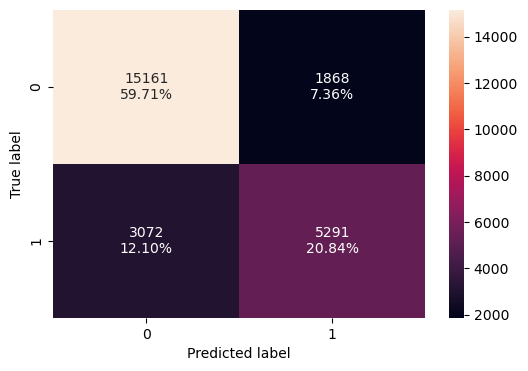

<IPython.core.display.Javascript object>

In [237]:
# create a confusion matrix for X_train1 and y_train
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [236]:
# Complete the code to check performance on X_train1 and y_train
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


<IPython.core.display.Javascript object>

#### Test set performance

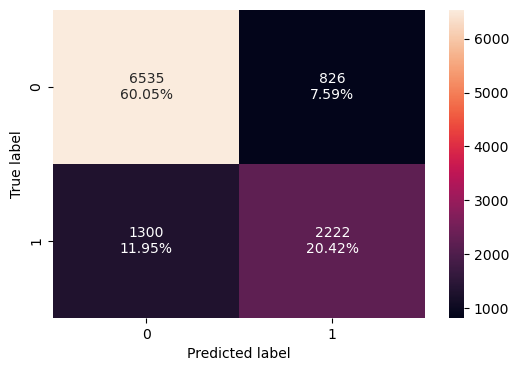

<IPython.core.display.Javascript object>

In [253]:
# creating confusion matrix for X_test1 and y_test
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [254]:
# checking model performance on X_test1 and y_test
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


<IPython.core.display.Javascript object>

- The model is giving a good f1_score of ~0.682 and ~0.676 on the train and test sets respectively.
- As the train and test performances are comparable, the model is not overfitting.
- Moving forward we will try to improve the performance of the model.

### Model Performance Improvement


#### ROC-AUC
* ROC-AUC on training set

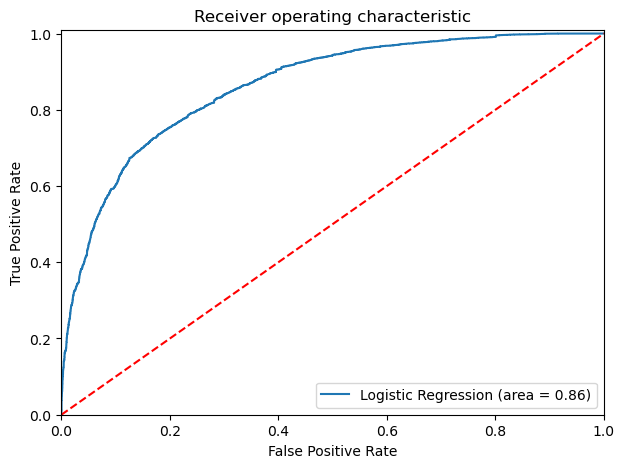

<IPython.core.display.Javascript object>

In [240]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- Logistic Regression model is giving a good performance on training set. Let's see if the F1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [241]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37005225587083423


<IPython.core.display.Javascript object>

#### Training set performance

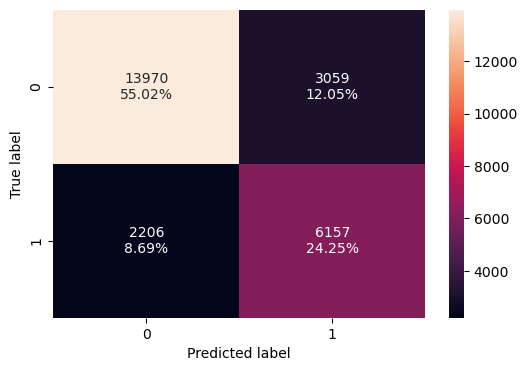

<IPython.core.display.Javascript object>

In [243]:
# creating the confusion matrix for X_train1 and y_train with optimal_threshold_auc_roc as threshold
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [244]:
# checking model performance for on X_train1 and y_train
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


<IPython.core.display.Javascript object>

- F1 and Recall of model have increased but Precision have decreased.
- The model is still giving a good performance.

#### Test set performance

- ROC curve on test set

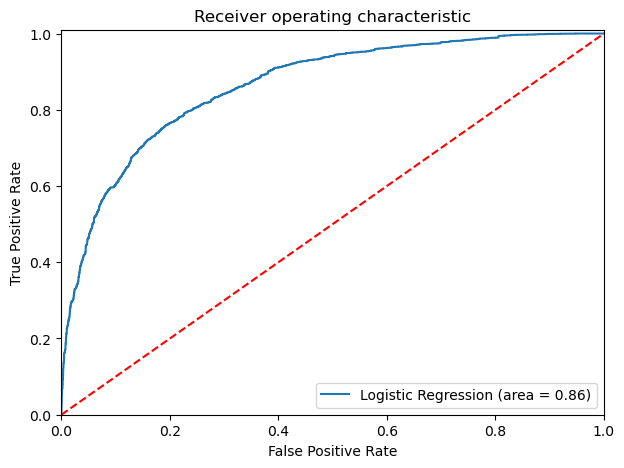

<IPython.core.display.Javascript object>

In [257]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

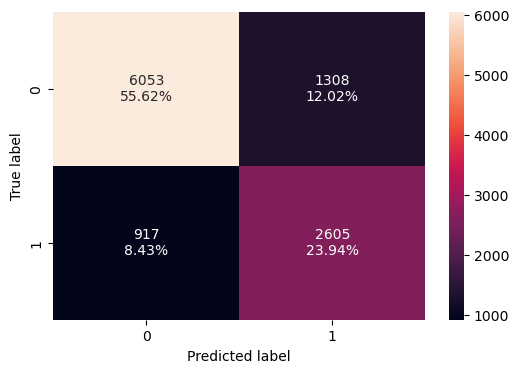

<IPython.core.display.Javascript object>

In [255]:
# creating the confusion matrix for X_test1 and y_test with optimal_threshold_auc_roc as threshold
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [256]:
# checking model performance for on X_test1 and y_test
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_test_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


<IPython.core.display.Javascript object>

- The model is giving a good f1_score of ~0.70 and ~0.701 on the train and test sets respectively.
- As the train and test performances are comparable, the model is not overfitting.


#### Precision-Recall Curve

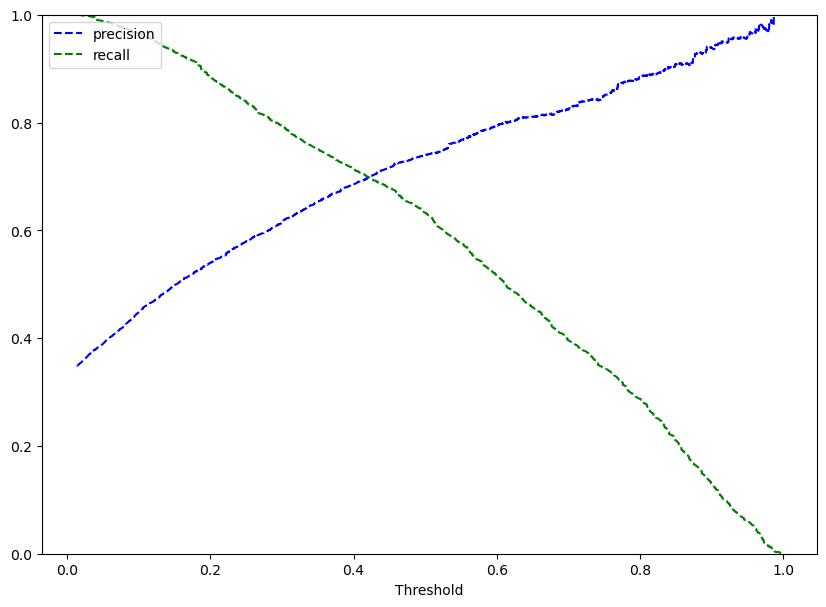

<IPython.core.display.Javascript object>

In [245]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [246]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

- At the threshold of 0.42, we get balanced recall and precision.

#### Training set performance

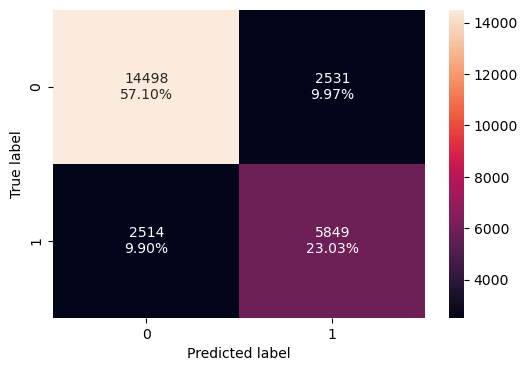

<IPython.core.display.Javascript object>

In [247]:
# creating the confusion matrix for X_train1 and y_train with optimal_threshold_curve as threshold
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [248]:
# checking model performance for X_train1 and y_train
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


<IPython.core.display.Javascript object>

- Model is performing well on training set.
- There's not much improvement in the model performance.

#### Test set performance

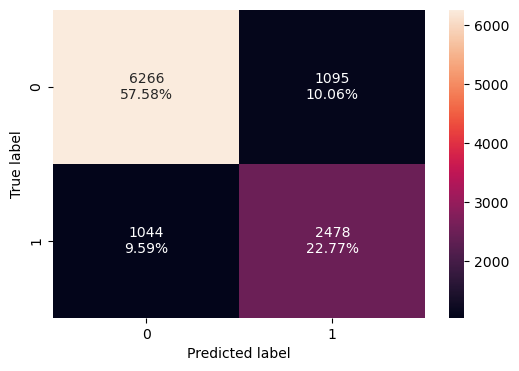

<IPython.core.display.Javascript object>

In [258]:
# creating the confusion matrix for X_test1 and y_test with optimal_threshold_curve as threshold
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [259]:
# checking model performance for X_test1 and y_test
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


<IPython.core.display.Javascript object>

- The model is giving a good f1_score of ~0.70 on both of the train and test sets respectively.
- As the train and test performances are comparable, the model is not overfitting.

#### Model performance summary


In [260]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


<IPython.core.display.Javascript object>

In [261]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852


<IPython.core.display.Javascript object>

- Almost all the three models are performing well on both training and test data without the problem of overfitting.
- The model with a default threshold (0.37) is giving the best F1 score (0.70), but low precision score. 
- The model with 0.42 threshold has a similar F1 score (0.69) and a balanced recall and precision score, therefore, we choose it as our final model because it provides a good balance between accurately predicting positive cases and minimizing false positives.

### Conclusions:

- We have been able to build a predictive model that can be used by the hotel to predict which bookings have higher chances of being canceled with a F1 score of 0.69 on the training set and formulate policies accordingly. 

- All the logistic regression models have given a generalized performance on the training and test set. 

* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, and type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to  increase in the chances of a booking being canceled.
- Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some room types, and some market segment types are negative, an increase in these will lead to decrease in chances of a booking being canceled.


## Building a Decision Tree model

#### Data Preparation for modeling (Decision Tree)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [263]:
# specifying the independent and dependent variables
X_DT = df.drop(["booking_status"], axis=1)
y_DT = df["booking_status"]

X_DT = pd.get_dummies(X_DT, drop_first=True)

# splitting data in train and test sets
X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(
    X_DT, y_DT, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [264]:
print("Shape of Training set : ", X_DT_train.shape)
print("Shape of test set : ", X_DT_test.shape)
print("Percentage of classes in training set:")
print(y_DT_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_DT_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

In [265]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [266]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Building Decision Tree Model

In [268]:
# fit decision tree on training data
dTree = DecisionTreeClassifier(random_state=1)
dTree.fit(X_DT_train, y_DT_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Training set performance

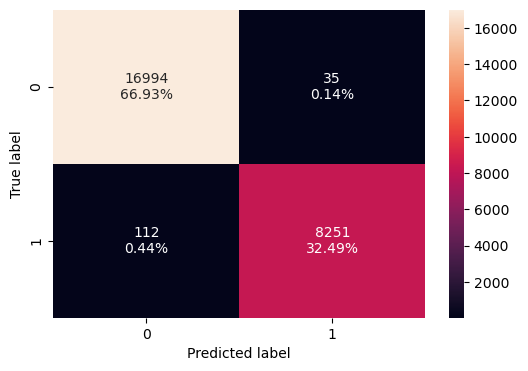

<IPython.core.display.Javascript object>

In [270]:
# create confusion matrix for training data
confusion_matrix_sklearn(dTree, X_DT_train, y_DT_train)

In [386]:
# checking model performance for training data
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree, X_DT_train, y_DT_train
)
decision_tree_perf_train


,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


<IPython.core.display.Javascript object>

#### Checking model performance on test set

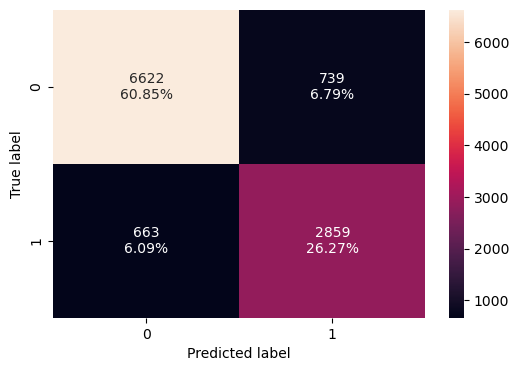

<IPython.core.display.Javascript object>

In [273]:
# create confusion matrix for test data
confusion_matrix_sklearn(dTree, X_DT_test, y_DT_test)

In [275]:
# checking model performance for test data
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree, X_DT_test, y_DT_test
)
decision_tree_perf_test


,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


<IPython.core.display.Javascript object>

- There's a slight disparity in performance of model on training set and test set, which suggests that the model is overfitting.

#### Pre-pruning 

**Using GridSearch for Hyperparameter tuning of our tree model**

In [276]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_DT_train, y_DT_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_DT_train, y_DT_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

#### Training set performance

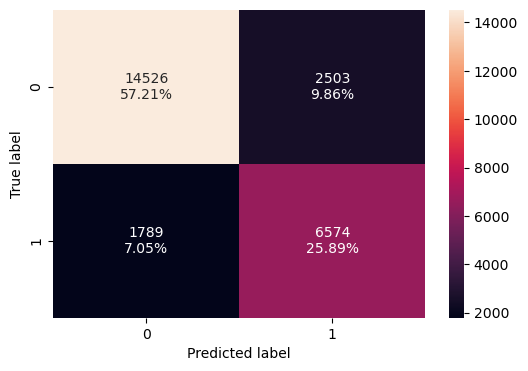

<IPython.core.display.Javascript object>

In [279]:
# create confusion matrix for training data
confusion_matrix_sklearn(estimator, X_DT_train, y_DT_train)

In [392]:
# checking model performance for training data
decision_tree_pretune_perf_train = model_performance_classification_sklearn(
    estimator, X_DT_train, y_DT_train
)
decision_tree_pretune_perf_train


,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


<IPython.core.display.Javascript object>

#### Test set performance

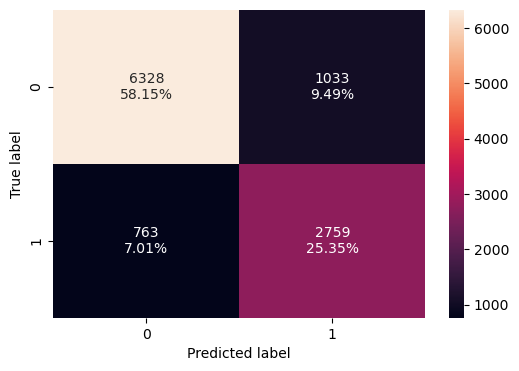

<IPython.core.display.Javascript object>

In [281]:
# create confusion matrix for test data
confusion_matrix_sklearn(estimator, X_DT_test, y_DT_test)

In [329]:
# checking model performance for test data
decision_tree_pretune_perf_test = model_performance_classification_sklearn(
    estimator, X_DT_test, y_DT_test
)
decision_tree_pretune_perf_test


,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


<IPython.core.display.Javascript object>

- The model is giving a generalized result now since the F1 scores on both the train and test data are around 0.75, which shows that the model is able to generalize well on unseen data.

#### Visualizing the Decision Tree

In [285]:
feature_names = list(X_DT.columns)
print((feature_names))

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

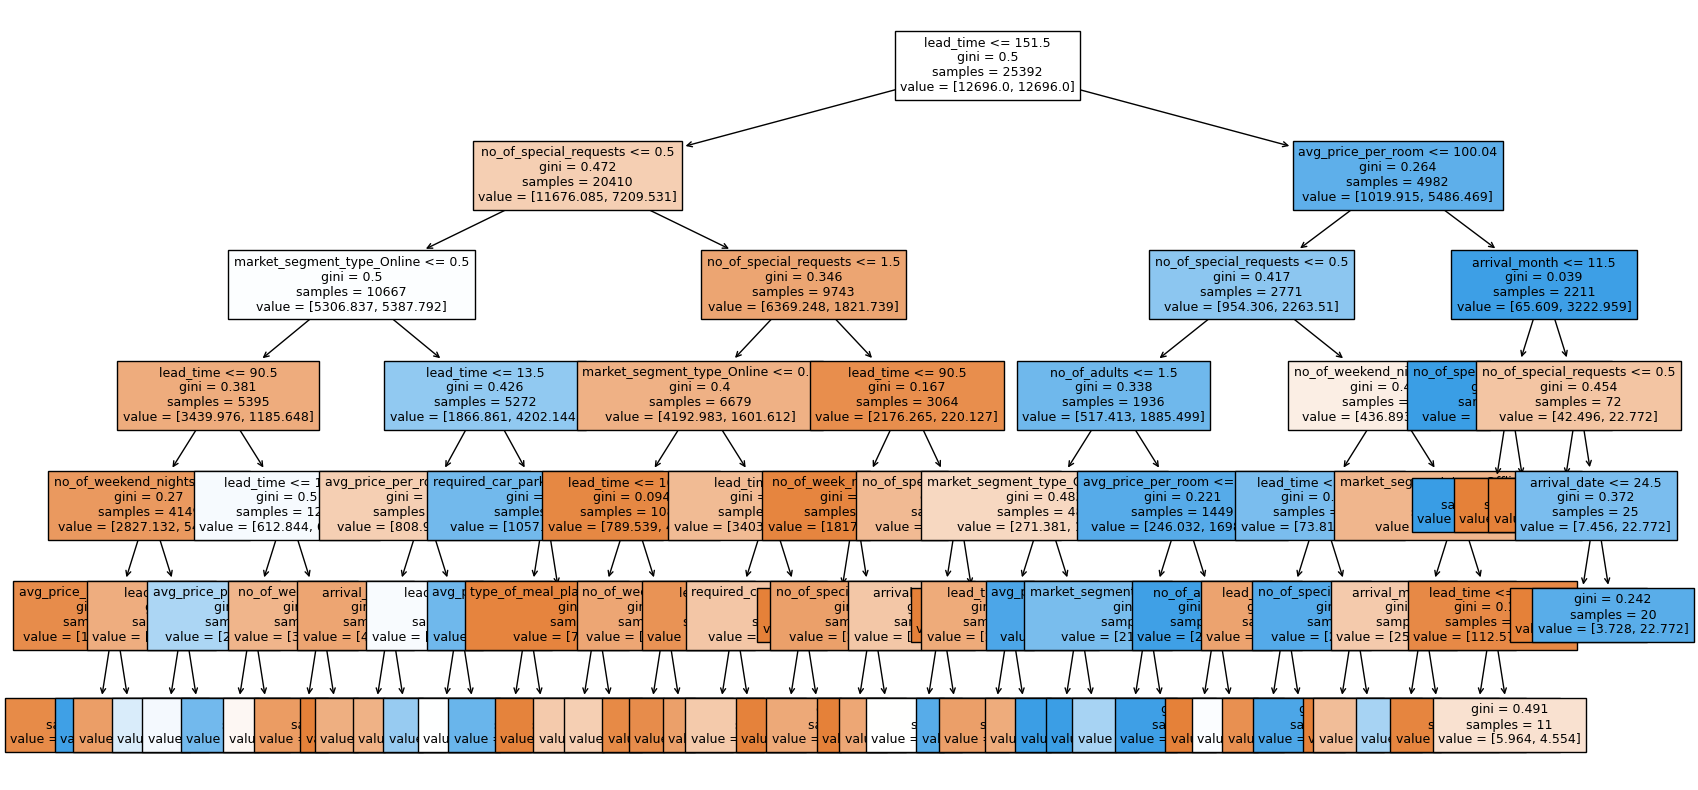

<IPython.core.display.Javascript object>

In [286]:
# plot decision tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [287]:
# text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

<IPython.core.display.Javascript object>

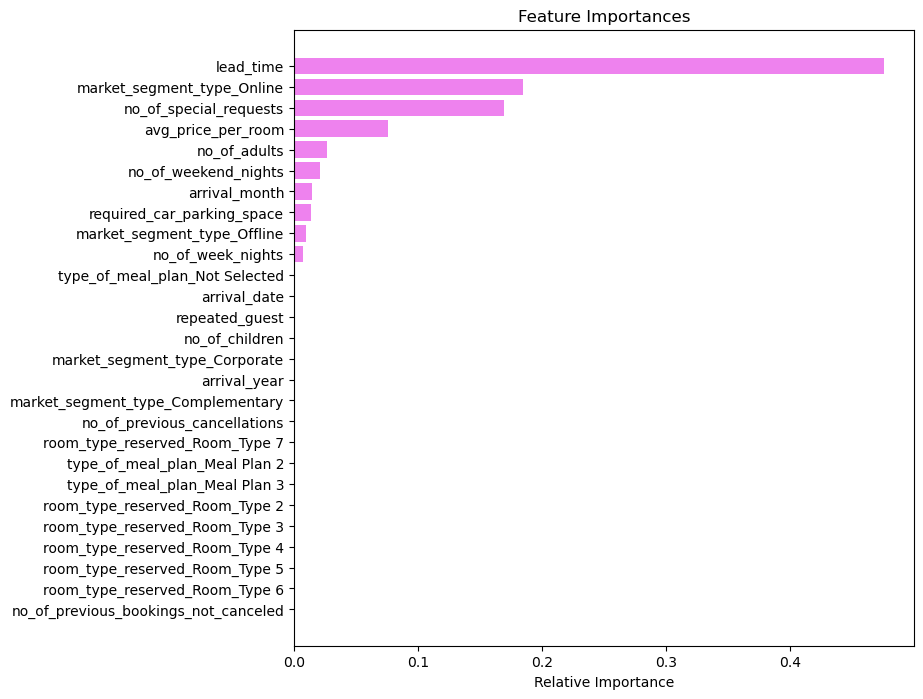

<IPython.core.display.Javascript object>

In [303]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre tuned decision tree also, `lead_time`, `market_segment_type_Online` and `no_of_special_requests` are the most important features.

**Cost Complexity Pruning**

In [308]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_DT_train, y_DT_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [309]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


<IPython.core.display.Javascript object>

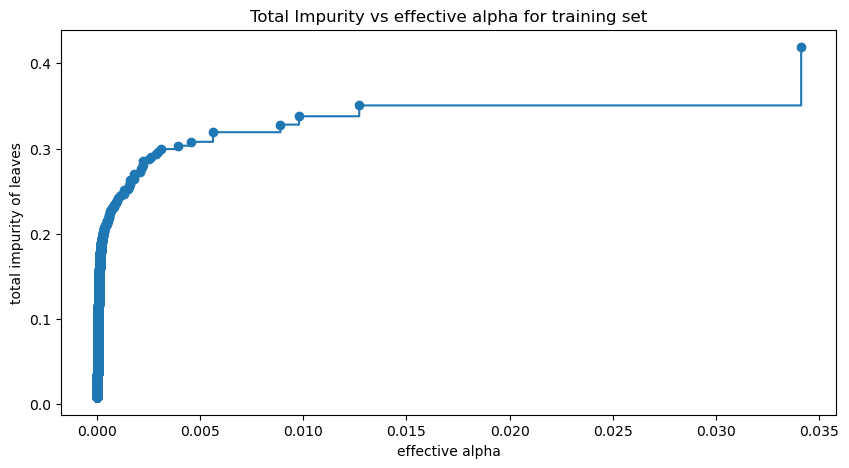

<IPython.core.display.Javascript object>

In [310]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [311]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_DT_train, y_DT_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


<IPython.core.display.Javascript object>

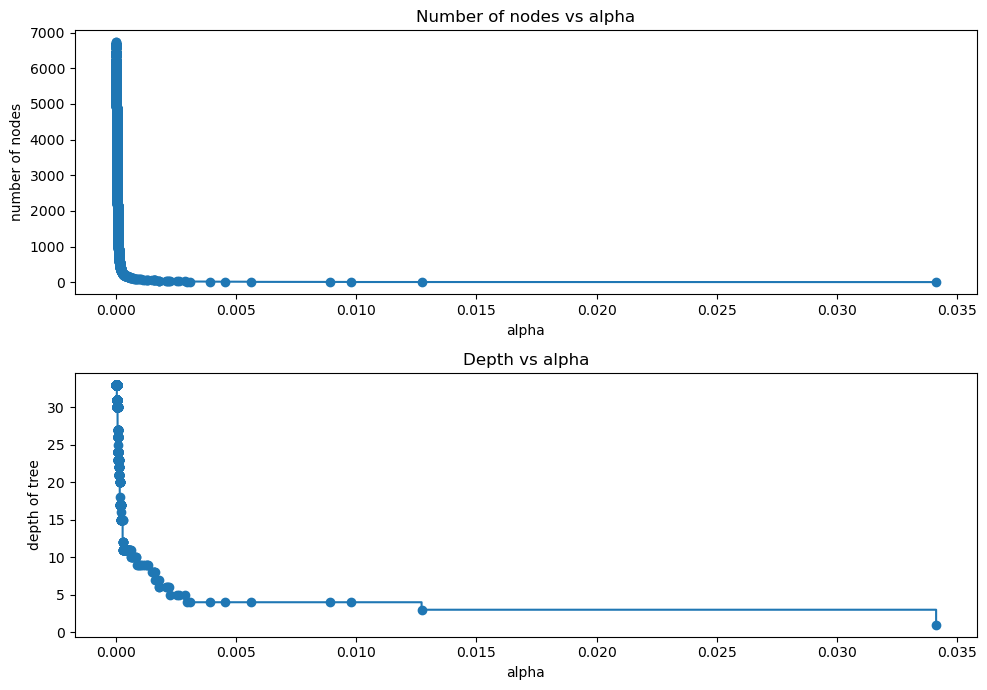

<IPython.core.display.Javascript object>

In [313]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [314]:
f1_DT_train = []
for clf in clfs:
    pred_train = clf.predict(X_DT_train)
    values_train = f1_score(y_DT_train, pred_train)
    f1_DT_train.append(values_train)

f1_DT_test = []
for clf in clfs:
    pred_test = clf.predict(X_DT_test)
    values_test = f1_score(y_DT_test, pred_test)
    f1_DT_test.append(values_test)

<IPython.core.display.Javascript object>

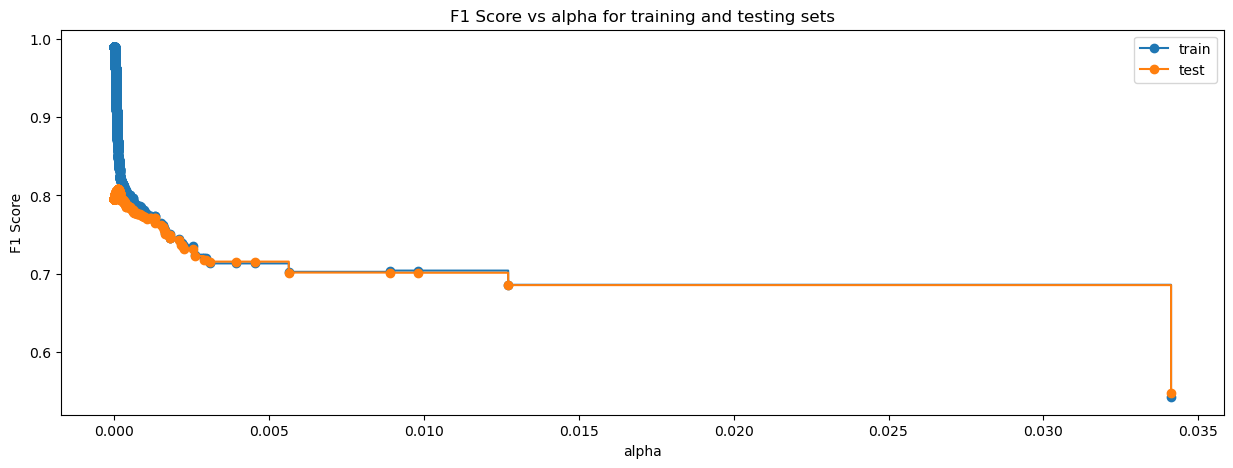

<IPython.core.display.Javascript object>

In [315]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_DT_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_DT_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [316]:
index_best_model = np.argmax(f1_DT_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


<IPython.core.display.Javascript object>

#### Training set performance

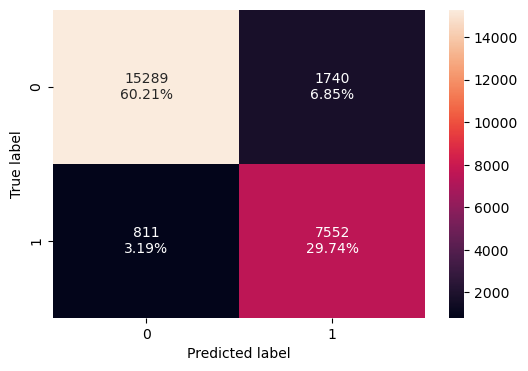

<IPython.core.display.Javascript object>

In [317]:
# create confusion matirx for training data on best model
confusion_matrix_sklearn(best_model, X_DT_train, y_DT_train)

In [318]:
# check model performance for training data
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_DT_train, y_DT_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89954,0.90303,0.81274,0.85551


<IPython.core.display.Javascript object>

#### Test set performance

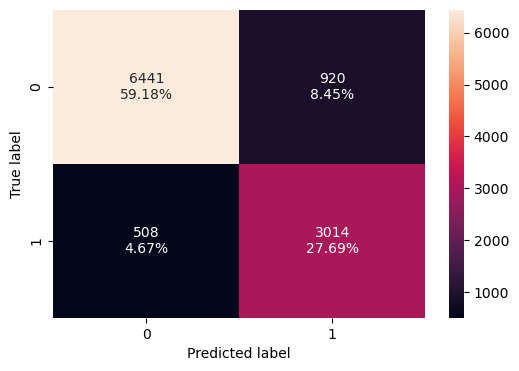

<IPython.core.display.Javascript object>

In [319]:
# create confusion matirx for test data on best model
confusion_matrix_sklearn(best_model, X_DT_test, y_DT_test)

In [320]:
# check model performance for test data
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_DT_test, y_DT_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86879,0.85576,0.76614,0.80848


<IPython.core.display.Javascript object>

- The model is giving a generalized result.
- The F1 score has increased for both train and test data. 

#### Visualizing the Decision Tree


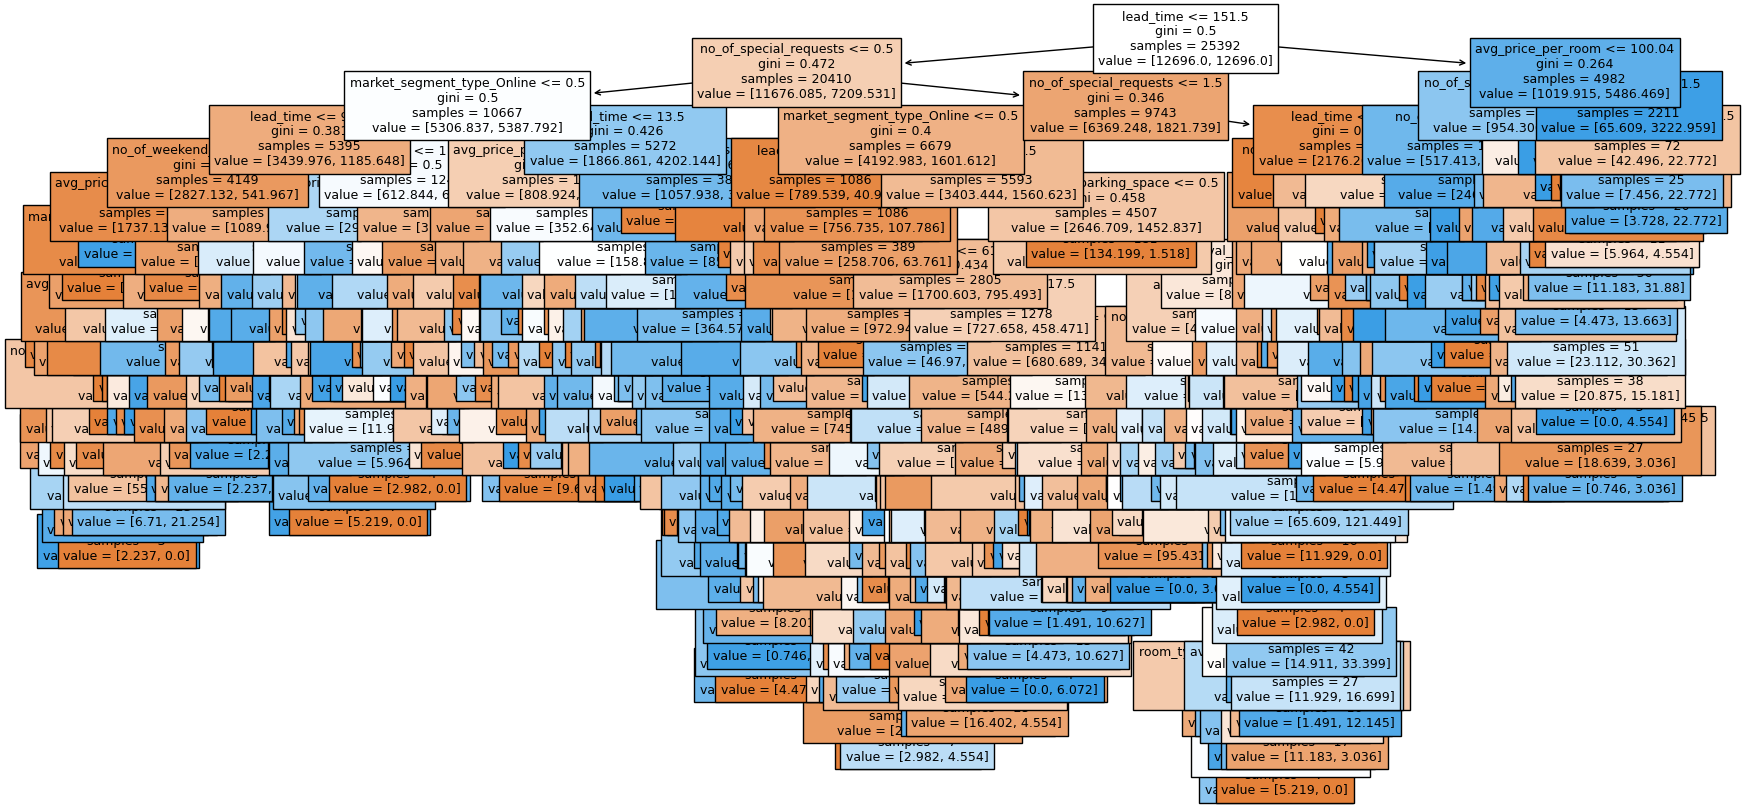

<IPython.core.display.Javascript object>

In [321]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [322]:
# Ttxt report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

<IPython.core.display.Javascript object>

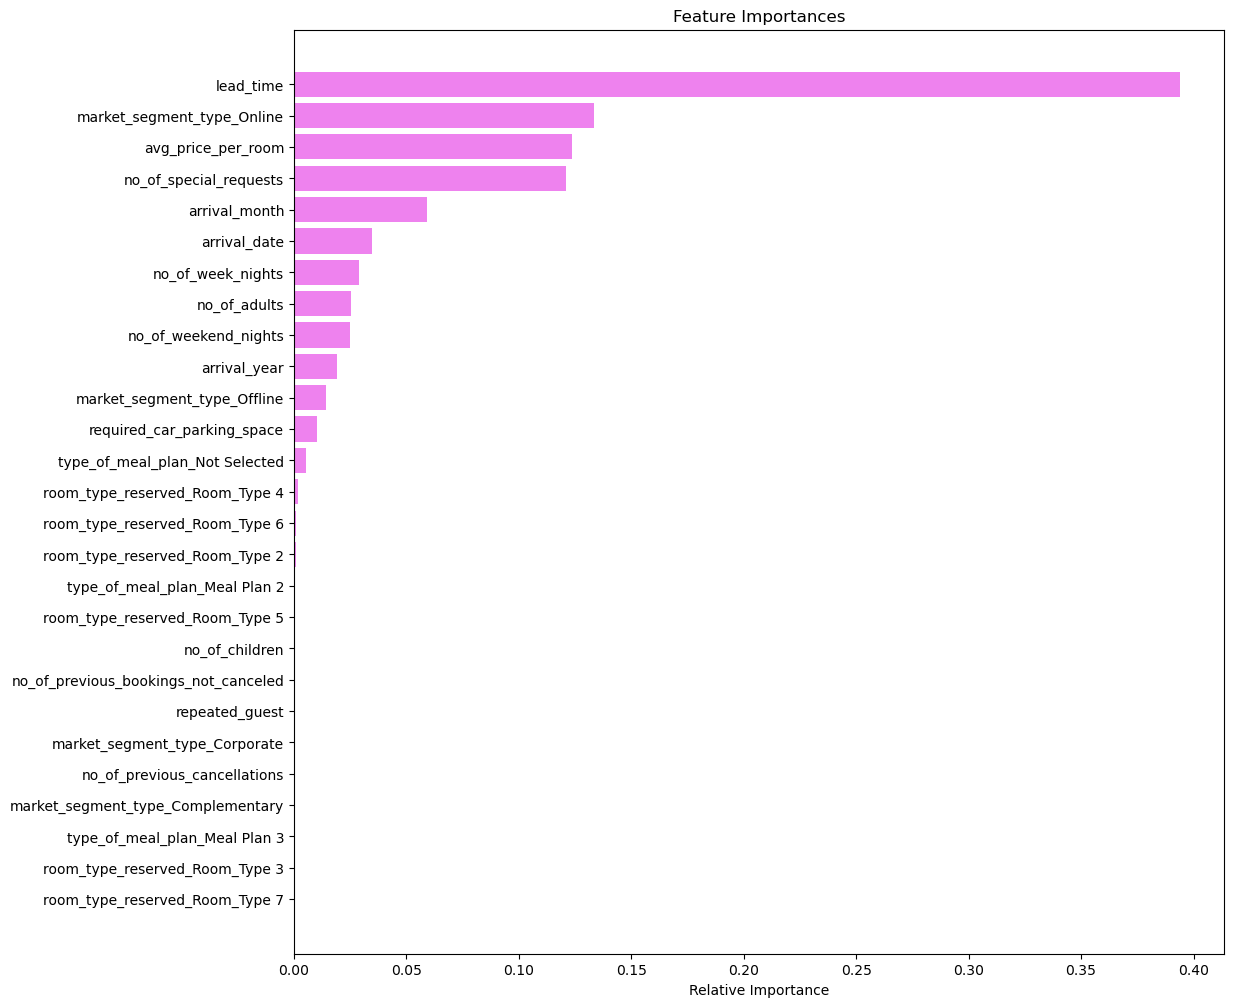

<IPython.core.display.Javascript object>

In [323]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the post tuned decision tree also, `lead_time`, `market_segment_type_Online` and `avg_price_per_room` are the most important features as well.

## Model Performance Comparison and Conclusions

In [394]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_pretune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89954
Recall,0.98661,0.78608,0.90303
Precision,0.99578,0.72425,0.81274
F1,0.99117,0.75390,0.85551


<IPython.core.display.Javascript object>

In [330]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_pretune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.83497,0.86879
Recall,0.81175,0.78336,0.85576
Precision,0.79461,0.72758,0.76614
F1,0.80309,0.75444,0.80848


<IPython.core.display.Javascript object>

- The original tree is over fitting.
- The post-pruned tree is giving the highest F1 score on both train and test set. 
- The pre-pruned tree exhibits a more balanced recall and precision score. This balance is beneficial as it helps optimize the allocation of hotel resources while also maintaining customer loyalty.

## Actionable Insights and Recommendations


### Conclusion:

- If the lead time is less than 151.5 days, and the customers don't make special requests while booking online, there is a higher likelihood of the bookings being canceled.
- If th lead time is more than 151.5 days, and the average price per room is less than or equal to 100 euros and the number of special request is 0, then the booking is likely to get canceled.
- Lead_time, market_segment_Online, no_of_special_requests, avg_price_per_room are important features.
- Cancellations are the lowest during holiday seasons, but high during Summer months. 

### Recommendations:

**Lead time:**
- For bookings with a lead time of less than 151.5 days and no special requests, the hotel should focus on providing personalized services. This can include personalized email reminders, special request deadlines, and transportation arrangements.
- For bookings with a lead time of more than 151.5 days and room prices less than or equal to 100 euros, the hotel should also provide personalized services to enhance the guest experience.

**Number of special requests:**
- The hotel should effectively communicate the benefits of adding special requests to customers. This can be done through clear explanations and highlighting the advantages of these requests.
- Personal reminders should be set up to inform customers about the deadlines for adding special requests, ensuring they don't miss out on the opportunity.

**Market segment:**
- A targeted cancellation policy should be implemented for customers who make their reservations online. This policy should include details about deadlines, refunds, and cancellation fees to provide transparency and minimize cancellations.

**Arrival month:**
- The hotel should plan and organize special events or activities during holiday periods when cancellations are low. This can help strengthen the hotel's brand identity and attract more bookings.
- Incentives can be offered to customers who book their stays during high fluctuation seasons, such as the Summer months. For example, providing open bar, soft drinks, or unlimited ice cream cones at the pool on weekdays can incentivize guests to keep their reservations and reduce cancellations.

**Repeated guest:**
- The hotel should consider implementing a membership program to further enhance brand loyalty among repeated guests. This can be exclusive benefits such as discounts, room upgrades, access to special amenities, priority reservations, and tailored promotions, etc.

By implementing these strategies, the hotel can improve the guest experience, reduce cancellations, and strengthen its brand reputation.